In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [3]:
dfAutotriti = pd.read_excel("/gdrive/My Drive/Colab Notebooks/BD2021/Final Exercise/Autotriti/AutotritiDataF.xlsx")

In [4]:
dfAutotriti

headline  ...                                          Coomments
0    ΟΔΗΓΟΥΜΕ ΤΟ ΗΛΕΚΤΡΙΚΟΟδηγούμε το νέο Hyundai I...  ...  Θεωρώ ότι τα επόμενα (λίγα) χρόνια η εξέλιξη τ...
1        Οι τιμές της Ford Mustang Mach-E στην Ελλάδα   ...                                        NO COMMENTS
2    ΦΟΡΤΙΣΗ ΣΕ 1 ΩΡΑ & ΑΥΤΟΝΟΜΙΑ 400 ΧΛΜ.Εντυπωσιά...  ...                                        NO COMMENTS
3                To 2021 στην αγορά το ηλεκτρικό Dacia  ...      Να μια καλη ειδηση! Ηλεκτρικο απο 11000 ευρω!
4    Αντέχει 350.000 ηλεκτρικά αυτοκίνητα το δίκτυο...  ...                                        NO COMMENTS
..                                                 ...  ...                                                ...
134          SEAT Leon e-Hybrid ή CUPRA Leon e-Hybrid;  ...                                        NO COMMENTS
135  Πως Ford & Hyundai κοντράρουν την Tesla καλύτε...  ...                                        NO COMMENTS
136            Νέα έκδοση Bronze του Toyota Highlander  ...                                        NO COMMENTS
137  Tο ηλεκτρικό μέλλον της Ford περιλαμβάνει και ...  ...                                        NO COMMENTS
138  ΣΥΜΒΑΤΙΚΕΣ & ΗΛΕΚΤΡΙΚΕΣ ΕΚΔΟΣΕΙΣΈρχονται τα νέ...  ...                                        NO COMMENTS

[139 rows x 5 columns]

In [5]:
af = dfAutotriti.Datethings.str.split(expand=True)

In [6]:
af

0             1      2   ...            10         11       12
0    [<div  class="clear  push5  ...  δημοσίευσης:   2/7/2021  </div>]
1    [<div  class="clear  push5  ...  δημοσίευσης:   2/7/2021  </div>]
2       NO          DATE   None  ...          None       None     None
3    [<div  class="clear  push5  ...  δημοσίευσης:  17/2/2020  </div>]
4    [<div  class="clear  push5  ...  δημοσίευσης:  29/1/2020  </div>]
..     ...           ...    ...  ...           ...        ...      ...
134  [<div  class="clear  push5  ...  δημοσίευσης:  28/5/2021  </div>]
135  [<div  class="clear  push5  ...  δημοσίευσης:  27/5/2021  </div>]
136  [<div  class="clear  push5  ...  δημοσίευσης:  27/5/2021  </div>]
137  [<div  class="clear  push5  ...  δημοσίευσης:  27/5/2021  </div>]
138    NaN           NaN    NaN  ...           NaN        NaN      NaN

[139 rows x 13 columns]

In [7]:
af = af[11]

In [8]:
af

0       2/7/2021
1       2/7/2021
2           None
3      17/2/2020
4      29/1/2020
         ...    
134    28/5/2021
135    27/5/2021
136    27/5/2021
137    27/5/2021
138          NaN
Name: 11, Length: 139, dtype: object

In [9]:
dfAutotriti['date'] = af

In [10]:
dfAutotriti

headline  ...       date
0    ΟΔΗΓΟΥΜΕ ΤΟ ΗΛΕΚΤΡΙΚΟΟδηγούμε το νέο Hyundai I...  ...   2/7/2021
1        Οι τιμές της Ford Mustang Mach-E στην Ελλάδα   ...   2/7/2021
2    ΦΟΡΤΙΣΗ ΣΕ 1 ΩΡΑ & ΑΥΤΟΝΟΜΙΑ 400 ΧΛΜ.Εντυπωσιά...  ...       None
3                To 2021 στην αγορά το ηλεκτρικό Dacia  ...  17/2/2020
4    Αντέχει 350.000 ηλεκτρικά αυτοκίνητα το δίκτυο...  ...  29/1/2020
..                                                 ...  ...        ...
134          SEAT Leon e-Hybrid ή CUPRA Leon e-Hybrid;  ...  28/5/2021
135  Πως Ford & Hyundai κοντράρουν την Tesla καλύτε...  ...  27/5/2021
136            Νέα έκδοση Bronze του Toyota Highlander  ...  27/5/2021
137  Tο ηλεκτρικό μέλλον της Ford περιλαμβάνει και ...  ...  27/5/2021
138  ΣΥΜΒΑΤΙΚΕΣ & ΗΛΕΚΤΡΙΚΕΣ ΕΚΔΟΣΕΙΣΈρχονται τα νέ...  ...        NaN

[139 rows x 6 columns]

In [11]:
dfAutotriti2 = dfAutotriti[['headline', 'date']]

In [12]:
dfAutotriti2

headline       date
0    ΟΔΗΓΟΥΜΕ ΤΟ ΗΛΕΚΤΡΙΚΟΟδηγούμε το νέο Hyundai I...   2/7/2021
1        Οι τιμές της Ford Mustang Mach-E στην Ελλάδα    2/7/2021
2    ΦΟΡΤΙΣΗ ΣΕ 1 ΩΡΑ & ΑΥΤΟΝΟΜΙΑ 400 ΧΛΜ.Εντυπωσιά...       None
3                To 2021 στην αγορά το ηλεκτρικό Dacia  17/2/2020
4    Αντέχει 350.000 ηλεκτρικά αυτοκίνητα το δίκτυο...  29/1/2020
..                                                 ...        ...
134          SEAT Leon e-Hybrid ή CUPRA Leon e-Hybrid;  28/5/2021
135  Πως Ford & Hyundai κοντράρουν την Tesla καλύτε...  27/5/2021
136            Νέα έκδοση Bronze του Toyota Highlander  27/5/2021
137  Tο ηλεκτρικό μέλλον της Ford περιλαμβάνει και ...  27/5/2021
138  ΣΥΜΒΑΤΙΚΕΣ & ΗΛΕΚΤΡΙΚΕΣ ΕΚΔΟΣΕΙΣΈρχονται τα νέ...        NaN

[139 rows x 2 columns]

In [13]:
dfAutotriti2['date'].value_counts(dropna=False)

NaN          30
3/6/2021     10
4/6/2021      8
31/5/2021     7
8/6/2021      7
14/6/2021     5
28/5/2021     5
1/6/2021      4
30/6/2021     4
22/6/2021     4
2/6/2021      4
27/5/2021     3
1/7/2021      3
28/6/2021     3
25/6/2021     3
10/6/2021     3
24/6/2021     3
7/6/2021      3
11/6/2021     3
9/6/2021      2
13/6/2021     2
16/6/2021     2
2/7/2021      2
19/6/2021     2
3/7/2021      2
29/5/2021     2
23/6/2021     2
12/6/2021     1
21/6/2021     1
18/6/2021     1
17/2/2020     1
17/6/2021     1
29/1/2020     1
4/7/2021      1
30/5/2021     1
29/6/2021     1
5/6/2021      1
15/6/2021     1
Name: date, dtype: int64

In [ ]:
#
Comments = dfAutotriti[['Coomments','lead','headline']]

In [ ]:
#Θα αναλύσουμε τους τίτλους καταρχάς και στη συνέχεια comments

In [ ]:
dfAutotriti2['headline'] = dfAutotriti2['headline'].str.replace(r'https?:\/\/.*[\r\n]*',"")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dfAutotriti2['headline'] = dfAutotriti2['headline'].str.replace("ηλεκτρικών", "ηλεκτρικό")
dfAutotriti2['headline'] = dfAutotriti2['headline'].str.replace("ηλεκτρικά", "ηλεκτρικό")
dfAutotriti2['headline'] = dfAutotriti2['headline'].str.replace("ηλεκτρικός", "ηλεκτρικό")
dfAutotriti2['headline'] = dfAutotriti2['headline'].str.replace("νέα", "νέο")
dfAutotriti2['headline'] = dfAutotriti2['headline'].str.replace("νέων", "νέο")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
dfAutotriti2['headline']

0      ΟΔΗΓΟΥΜΕ ΤΟ ΗΛΕΚΤΡΙΚΟΟδηγούμε το νέο Hyundai I...
1          Οι τιμές της Ford Mustang Mach-E στην Ελλάδα 
2      ΦΟΡΤΙΣΗ ΣΕ 1 ΩΡΑ & ΑΥΤΟΝΟΜΙΑ 400 ΧΛΜ.Εντυπωσιά...
3                  To 2021 στην αγορά το ηλεκτρικό Dacia
4      Αντέχει 350.000 ηλεκτρικό αυτοκίνητα το δίκτυο...
                             ...                        
134            SEAT Leon e-Hybrid ή CUPRA Leon e-Hybrid;
135    Πως Ford & Hyundai κοντράρουν την Tesla καλύτε...
136              Νέα έκδοση Bronze του Toyota Highlander
137    Tο ηλεκτρικό μέλλον της Ford περιλαμβάνει και ...
138    ΣΥΜΒΑΤΙΚΕΣ & ΗΛΕΚΤΡΙΚΕΣ ΕΚΔΟΣΕΙΣΈρχονται τα νέ...
Name: headline, Length: 139, dtype: object

In [ ]:
dfAutotriti2Header = dfAutotriti2['headline'] .str.cat(sep = ' ').replace("amp", ' ')

In [ ]:
dfAutotriti2Header

'ΟΔΗΓΟΥΜΕ ΤΟ ΗΛΕΚΤΡΙΚΟΟδηγούμε το νέο Hyundai Ioniq 5 Οι τιμές της Ford Mustang Mach-E στην Ελλάδα  ΦΟΡΤΙΣΗ ΣΕ 1 ΩΡΑ & ΑΥΤΟΝΟΜΙΑ 400 ΧΛΜ.Εντυπωσιάζει το ηλεκτρικό Mercedes eActros (+vid) To 2021 στην αγορά το ηλεκτρικό Dacia Αντέχει 350.000 ηλεκτρικό αυτοκίνητα το δίκτυο της Ελλάδας ΗΛΕΚΤΡΙΚΟ & VALUE FOR MONEY!To Maxus eDeliver 9 σας «βάζει στην πρίζα»!  EVziiin και Schneider Electric: Σχέση αγάπης με το περιβάλλον ΥΒΡΙΔΙΚΟ ΠΟΥ ΚΑΙΕΙ ΜΟΛΙΣ 5,1 ΛΤ.Δοκιμή: Το υβριδικό Jazz καίει μόλις 5,1 λίτρα! ΥΒΡΙΔΙΚΟ ΜΕ 140 PS, «ΚΑΙΕΙ» 5,3 ΛΤ.Δοκιμή: Υβριδικό Renault Clio E-Tech με 140 PS ΠΟΙΟ ΔΙΑΛΕΓΕΙΣ ΜΕ ΣΧΕΔΟΝ 200PS;Hyundai Kona Vs Toyota C-HR ΜΕ 240 ΑΛΟΓΑ & ΚΑΤΑΝΑΛΩΣΗ 6 ΛΤ.Δοκιμή: Jeep Compass 4xe | Με 240 άλογα & κατανάλωση 6λτ.! Πρεμιέρα για τη νέο Ferrari 296 GTB με 830 ίππους! Plug-in hybrid: Μαγκιά, λύση ή «άκυρα»; SCANIA, MAN & VOLVOΔιανομές με ηλεκτρικό φορτηγά (+vids) ΑΚΡΑΙΕΣ ΔΟΚΙΜΕΣ ΕΞΕΛΙΞΗΣΤα «βασανιστήρια» του Ford E-Transit (+vid) Διπλή παρουσία της MC CHARGERS στο Εcofest 2021! MILD 

4. Αφαίρεση Stopwords, Lemmatization, 7. Wordcloud**

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
list(STOPWORDS)[0:20]

['same',
 'there',
 "where's",
 'ever',
 'during',
 'did',
 'into',
 'themselves',
 'theirs',
 'once',
 'most',
 'was',
 'an',
 'which',
 'any',
 'herself',
 'yours',
 'their',
 'these',
 'its']

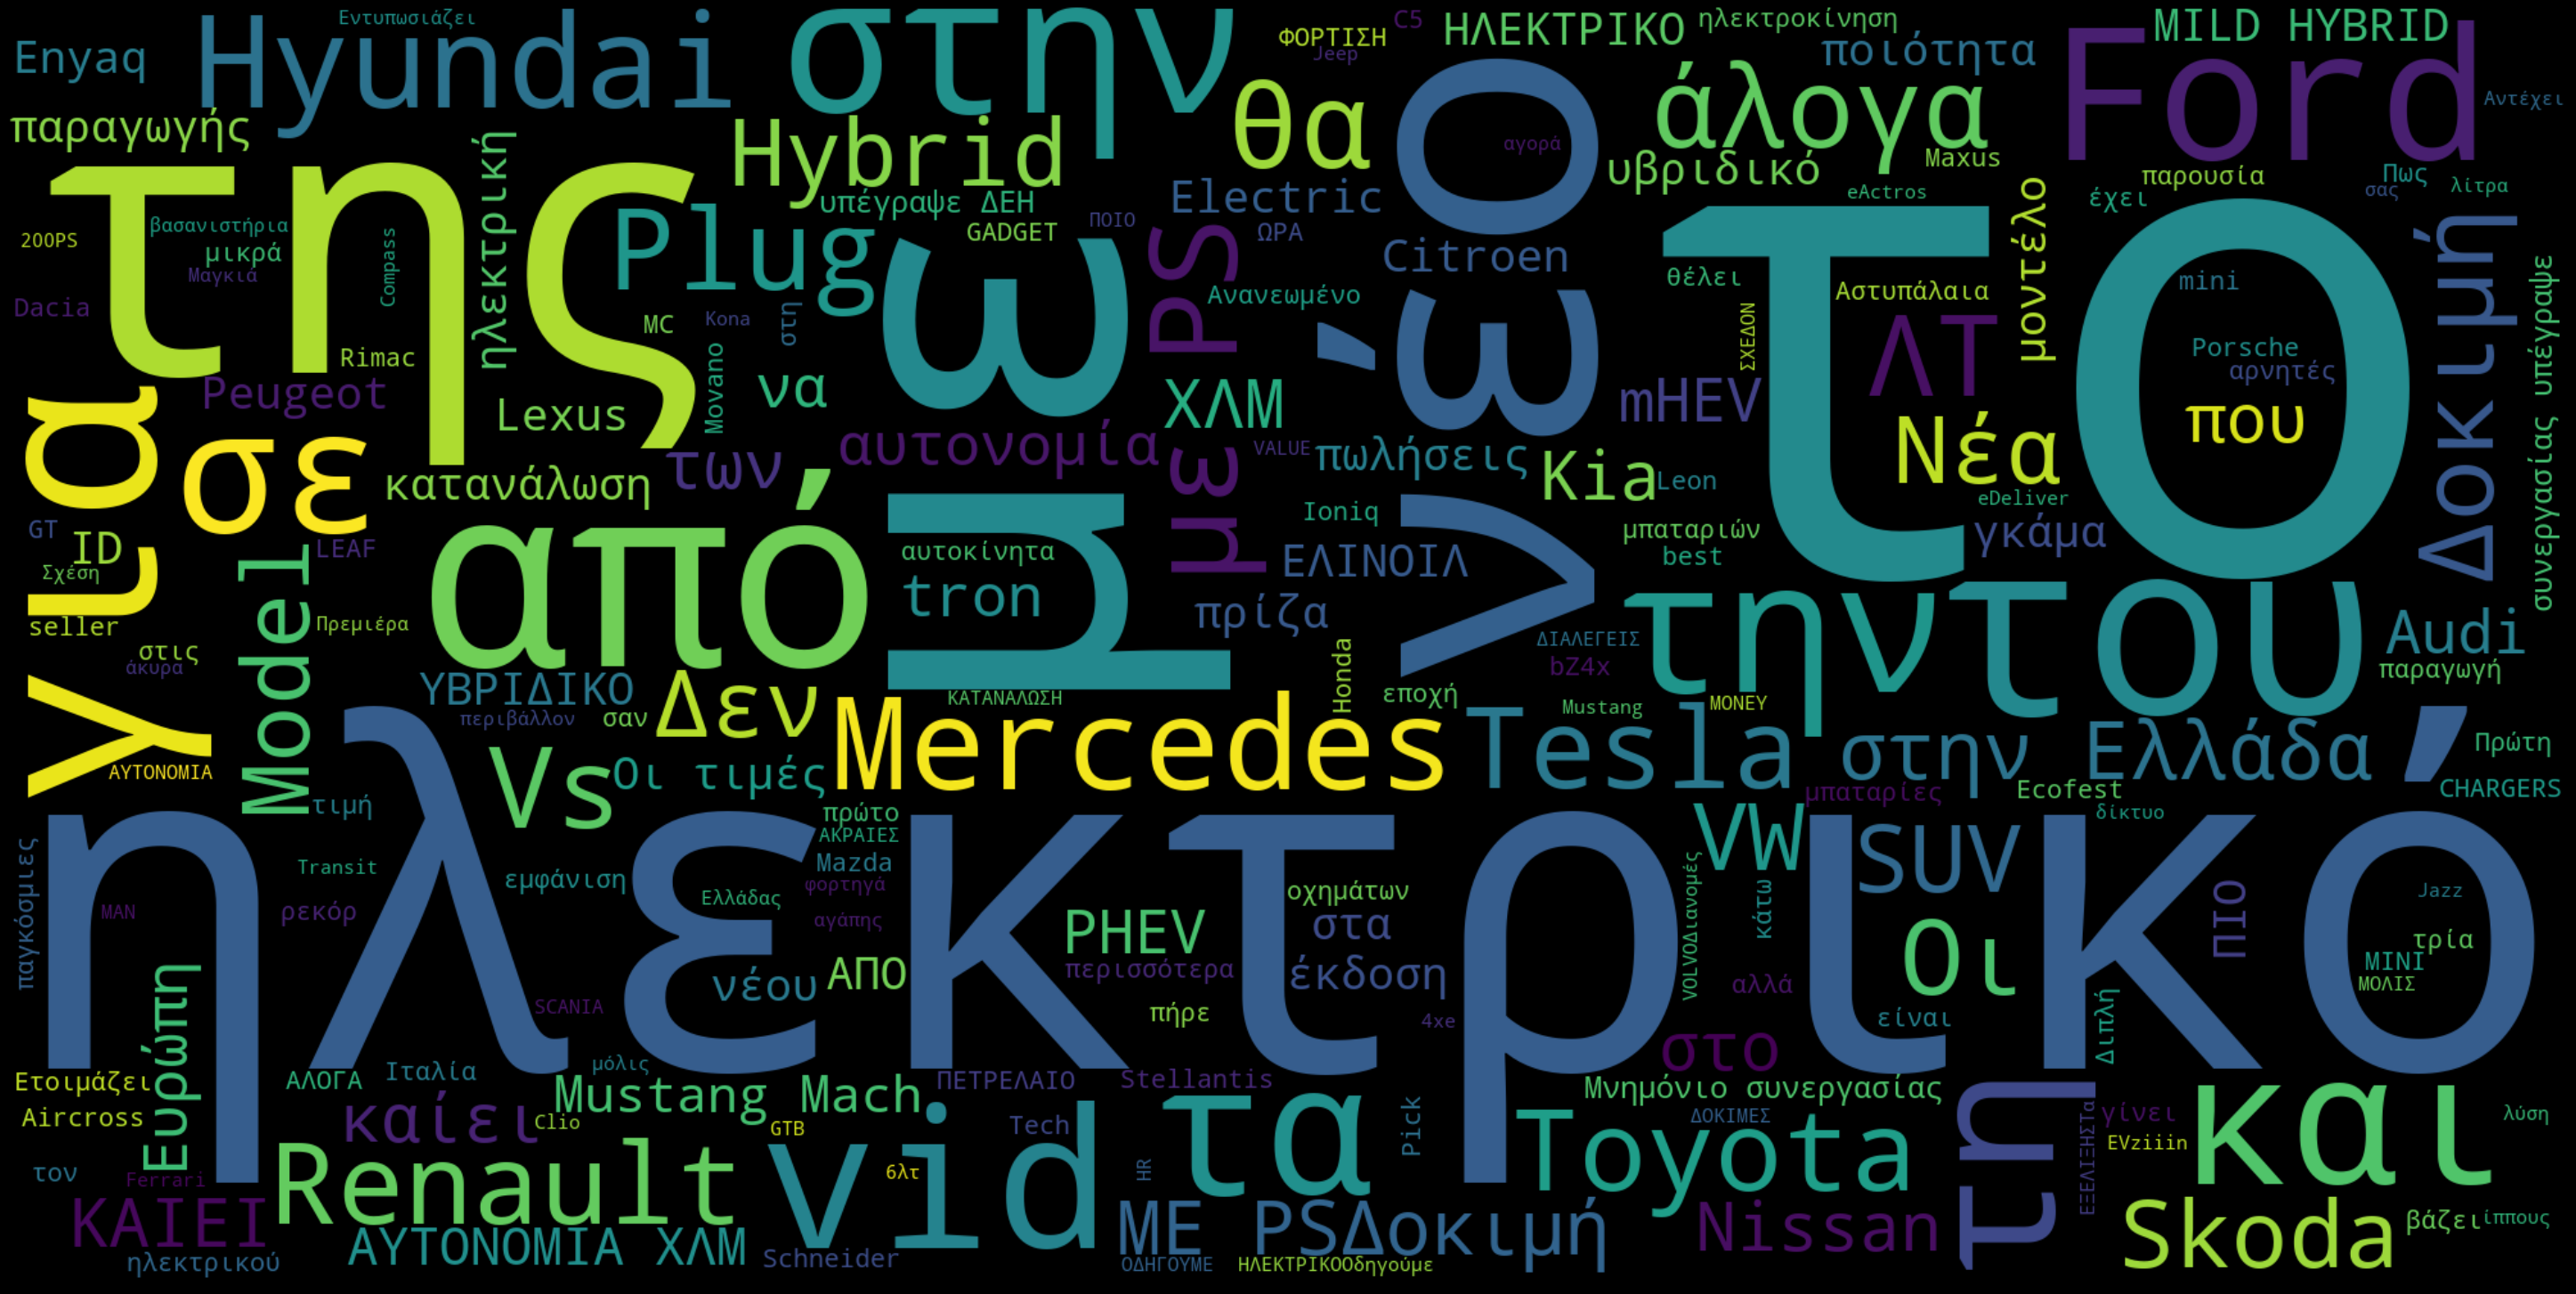

In [ ]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(dfAutotriti2Header)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
import spacy

In [ ]:
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
list(nlp.Defaults.stop_words)[0:20]

['μερικές',
 'συχνός',
 'έχοντας',
 'συν',
 'ίδιος',
 'ταύτης',
 'τούτα',
 'γύρω',
 'οποιονδήποτε',
 'ίδιαν',
 'εδώ',
 'πάντως',
 'όλο',
 'μιαν',
 'όλες',
 'εσείς',
 'κάποια',
 'σαν',
 'ολονέν',
 'αν']

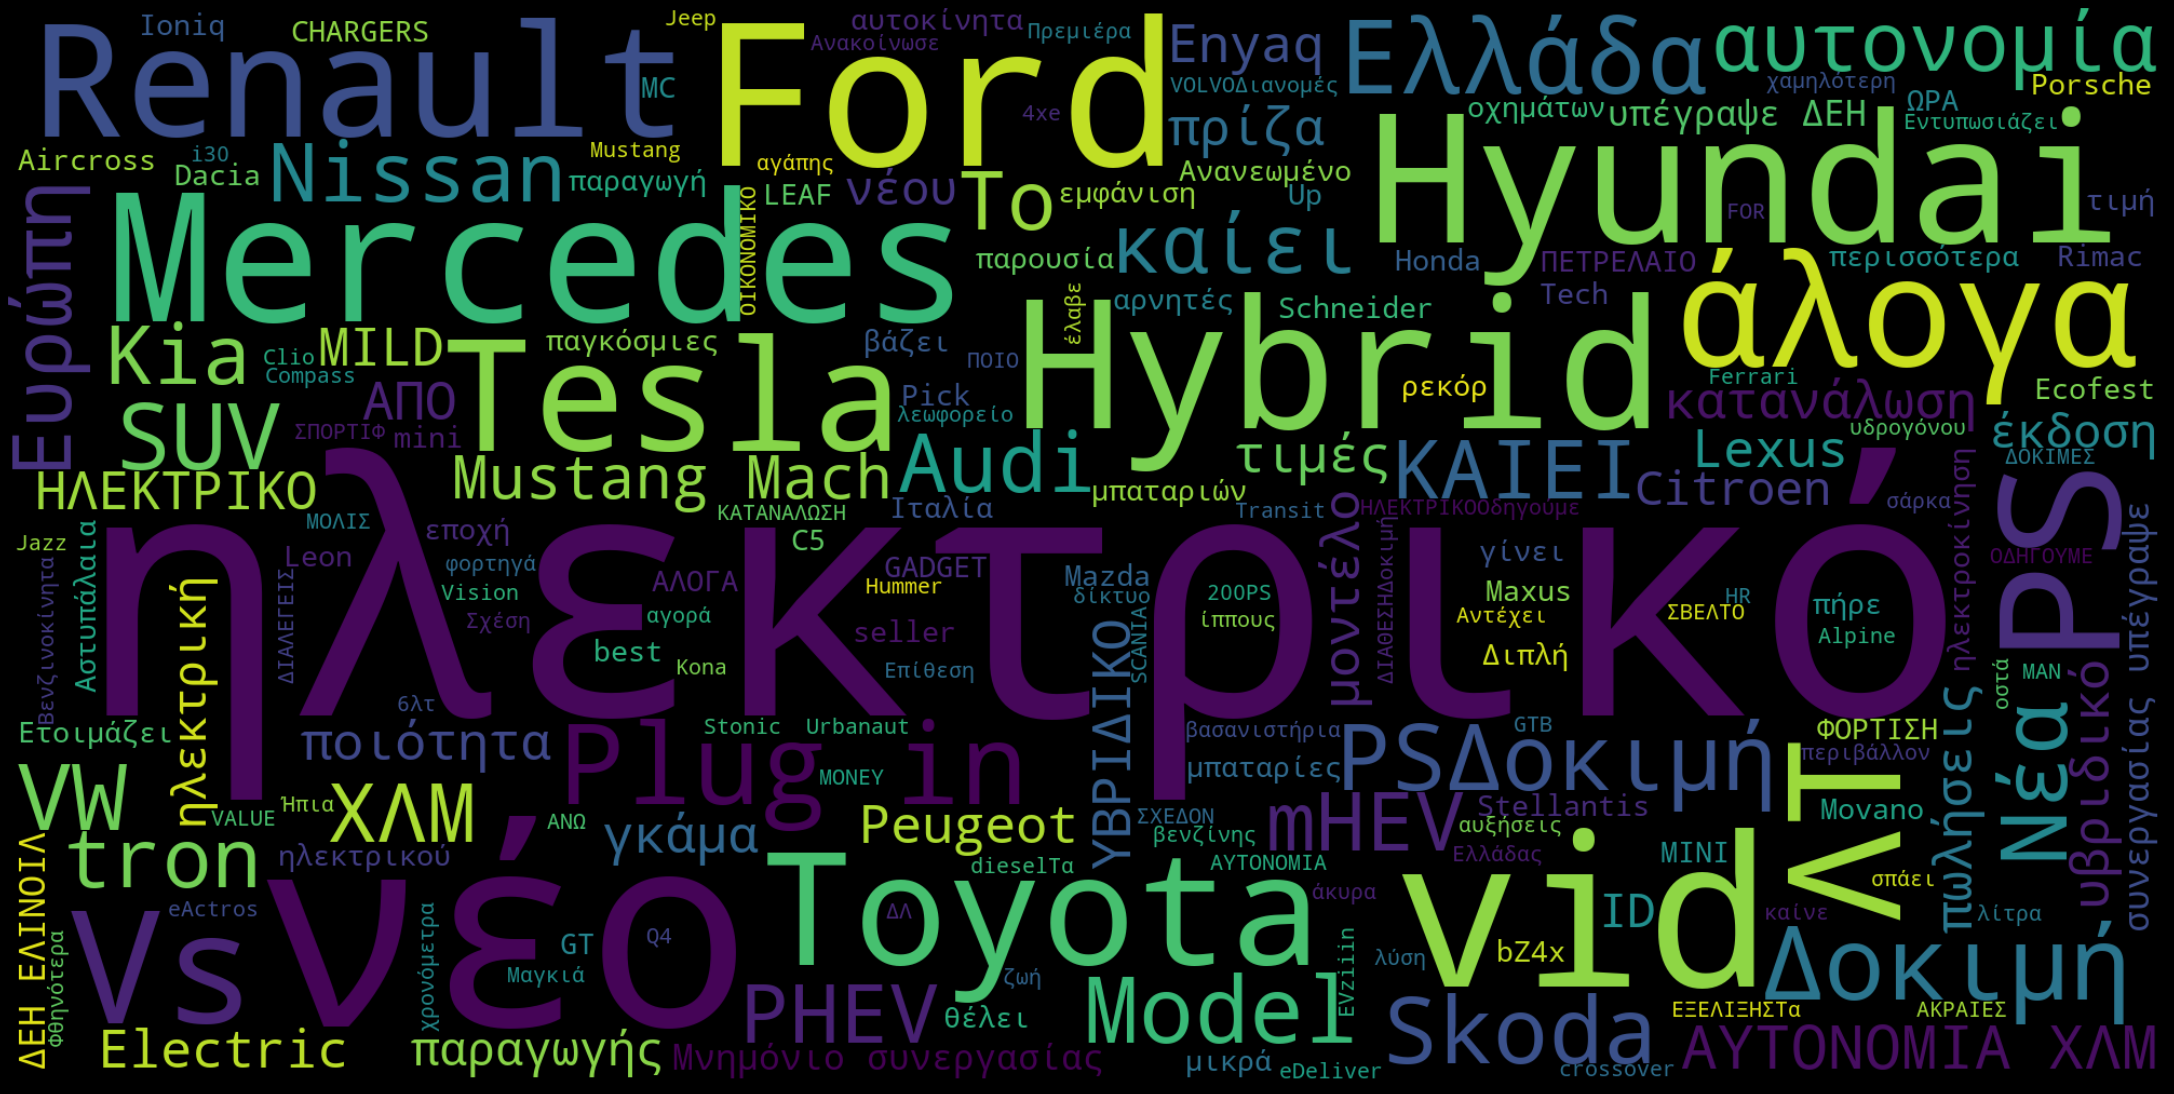

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(dfAutotriti2Header)
fig = plt.figure(
    figsize = (30, 20),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Ας βρούμε για καθε λέξη που βρίσκεται σε διαφορετικές πτώσεις στην ονομαστική, και τα ρήματα στο 1ο πρόσωπο... Lemmatization

In [ ]:
doc = nlp(dfAutotriti2['headline'][1])

In [ ]:
for token in doc:
    print(token, token.lemma_)

Οι οι
τιμές τιμή
της της
Ford ford
Mustang mustang
Mach-E mach-e
στην στην
Ελλάδα Ελλάδα


In [ ]:
' '.join(token.lemma_ for token in doc)

'οι τιμή της ford mustang mach-e στην Ελλάδα'

In [ ]:
dfAutotriti2Header

'ΟΔΗΓΟΥΜΕ ΤΟ ΗΛΕΚΤΡΙΚΟΟδηγούμε το νέο Hyundai Ioniq 5 Οι τιμές της Ford Mustang Mach-E στην Ελλάδα  ΦΟΡΤΙΣΗ ΣΕ 1 ΩΡΑ & ΑΥΤΟΝΟΜΙΑ 400 ΧΛΜ.Εντυπωσιάζει το ηλεκτρικό Mercedes eActros (+vid) To 2021 στην αγορά το ηλεκτρικό Dacia Αντέχει 350.000 ηλεκτρικό αυτοκίνητα το δίκτυο της Ελλάδας ΗΛΕΚΤΡΙΚΟ & VALUE FOR MONEY!To Maxus eDeliver 9 σας «βάζει στην πρίζα»!  EVziiin και Schneider Electric: Σχέση αγάπης με το περιβάλλον ΥΒΡΙΔΙΚΟ ΠΟΥ ΚΑΙΕΙ ΜΟΛΙΣ 5,1 ΛΤ.Δοκιμή: Το υβριδικό Jazz καίει μόλις 5,1 λίτρα! ΥΒΡΙΔΙΚΟ ΜΕ 140 PS, «ΚΑΙΕΙ» 5,3 ΛΤ.Δοκιμή: Υβριδικό Renault Clio E-Tech με 140 PS ΠΟΙΟ ΔΙΑΛΕΓΕΙΣ ΜΕ ΣΧΕΔΟΝ 200PS;Hyundai Kona Vs Toyota C-HR ΜΕ 240 ΑΛΟΓΑ & ΚΑΤΑΝΑΛΩΣΗ 6 ΛΤ.Δοκιμή: Jeep Compass 4xe | Με 240 άλογα & κατανάλωση 6λτ.! Πρεμιέρα για τη νέο Ferrari 296 GTB με 830 ίππους! Plug-in hybrid: Μαγκιά, λύση ή «άκυρα»; SCANIA, MAN & VOLVOΔιανομές με ηλεκτρικό φορτηγά (+vids) ΑΚΡΑΙΕΣ ΔΟΚΙΜΕΣ ΕΞΕΛΙΞΗΣΤα «βασανιστήρια» του Ford E-Transit (+vid) Διπλή παρουσία της MC CHARGERS στο Εcofest 2021! MILD 

In [ ]:
full_doc = nlp(dfAutotriti2Header)

In [ ]:
full_doc

ΟΔΗΓΟΥΜΕ ΤΟ ΗΛΕΚΤΡΙΚΟΟδηγούμε το νέο Hyundai Ioniq 5 Οι τιμές της Ford Mustang Mach-E στην Ελλάδα  ΦΟΡΤΙΣΗ ΣΕ 1 ΩΡΑ & ΑΥΤΟΝΟΜΙΑ 400 ΧΛΜ.Εντυπωσιάζει το ηλεκτρικό Mercedes eActros (+vid) To 2021 στην αγορά το ηλεκτρικό Dacia Αντέχει 350.000 ηλεκτρικό αυτοκίνητα το δίκτυο της Ελλάδας ΗΛΕΚΤΡΙΚΟ & VALUE FOR MONEY!To Maxus eDeliver 9 σας «βάζει στην πρίζα»!  EVziiin και Schneider Electric: Σχέση αγάπης με το περιβάλλον ΥΒΡΙΔΙΚΟ ΠΟΥ ΚΑΙΕΙ ΜΟΛΙΣ 5,1 ΛΤ.Δοκιμή: Το υβριδικό Jazz καίει μόλις 5,1 λίτρα! ΥΒΡΙΔΙΚΟ ΜΕ 140 PS, «ΚΑΙΕΙ» 5,3 ΛΤ.Δοκιμή: Υβριδικό Renault Clio E-Tech με 140 PS ΠΟΙΟ ΔΙΑΛΕΓΕΙΣ ΜΕ ΣΧΕΔΟΝ 200PS;Hyundai Kona Vs Toyota C-HR ΜΕ 240 ΑΛΟΓΑ & ΚΑΤΑΝΑΛΩΣΗ 6 ΛΤ.Δοκιμή: Jeep Compass 4xe | Με 240 άλογα & κατανάλωση 6λτ.! Πρεμιέρα για τη νέο Ferrari 296 GTB με 830 ίππους! Plug-in hybrid: Μαγκιά, λύση ή «άκυρα»; SCANIA, MAN & VOLVOΔιανομές με ηλεκτρικό φορτηγά (+vids) ΑΚΡΑΙΕΣ ΔΟΚΙΜΕΣ ΕΞΕΛΙΞΗΣΤα «βασανιστήρια» του Ford E-Transit (+vid) Διπλή παρουσία της MC CHARGERS στο Εcofest 2021! MILD H

Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(dfAutotriti2['headline'])

In [ ]:
count_vector

<139x607 sparse matrix of type '<class 'numpy.int64'>'
	with 1167 stored elements in Compressed Sparse Row format>

In [ ]:
count_vector.shape

(139, 607)

In [ ]:
# cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

000  10  100  120  140  155  165  ...  ωραe  ως  ωφέλιμο  όλα  όλη  όμιλο  όσο
0    0   0    0    0    0    0    0  ...     0   0        0    0    0      0    0
1    0   0    0    0    0    0    0  ...     0   0        0    0    0      0    0
2    0   0    0    0    0    0    0  ...     0   0        0    0    0      0    0
3    0   0    0    0    0    0    0  ...     0   0        0    0    0      0    0
4    1   0    0    0    0    0    0  ...     0   0        0    0    0      0    0

[5 rows x 607 columns]

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [ ]:
count_vector = cv.fit_transform(dfAutotriti2['headline'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head(20)

000  10  100  120  2021  ...  υβριδικό  υπέγραψε  φορτιση  χλμ  ωρα
0     0   0    0    0     0  ...         0         0        0    0    0
1     0   0    0    0     0  ...         0         0        0    0    0
2     0   0    0    0     0  ...         0         0        1    1    1
3     0   0    0    0     1  ...         0         0        0    0    0
4     1   0    0    0     0  ...         0         0        0    0    0
5     0   0    0    0     0  ...         0         0        0    0    0
6     0   0    0    0     0  ...         0         0        0    0    0
7     0   0    0    0     0  ...         1         0        0    0    0
8     0   0    0    0     0  ...         1         0        0    0    0
9     0   0    0    0     0  ...         0         0        0    0    0
10    0   0    0    0     0  ...         0         0        0    0    0
11    0   0    0    0     0  ...         0         0        0    0    0
12    0   0    0    0     0  ...         0         0        0    0    0
13    0   0    0    0     0  ...         0         0        0    0    0
14    0   0    0    0     0  ...         0         0        0    0    0
15    0   0    0    0     1  ...         0         0        0    0    0
16    0   0    0    2     0  ...         1         0        0    0    0
17    0   0    0    0     0  ...         0         0        0    0    0
18    0   0    0    0     0  ...         0         0        0    0    0
19    0   0    1    0     0  ...         0         0        0    1    1

[20 rows x 124 columns]

In [ ]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [ ]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(dfAutotriti2['headline'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπο', 'αλλιώτικο', 'αλλοιώτικας', 'αφότο', 'βεβαιότατας', 'γρήγορο', 'δίχω', 'εαυτής', 'εκάστα', 'εκάστο', 'ετού', 'ευθύ', 'εχτή', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνε', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιώ', 'πολλός', 'προχθέ', 'προχτέ', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'τούτε', 'όποι'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


+vid  +vids  1,0  120  2021  ...  υβριδικό  υπέγραψε  φορτιση  χλμ.  ωρα
0     0      0    0    0     0  ...         0         0        0     0    0
1     0      0    0    0     0  ...         0         0        0     0    0
2     1      0    0    0     0  ...         0         0        1     0    1
3     0      0    0    0     1  ...         0         0        0     0    0
4     0      0    0    0     0  ...         0         0        0     0    0

[5 rows x 109 columns]

In [ ]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(dfAutotriti2['headline'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

ford  hybrid  hyundai  in  mercedes  ...  άλογα  ηλεκτρικό  λτ  νέο  χλμ
0     0       0        1   0         0  ...      0          0   0    1    0
1     1       0        0   0         0  ...      0          0   0    0    0
2     0       0        0   0         1  ...      0          1   0    0    1
3     0       0        0   0         0  ...      0          1   0    0    0
4     0       0        0   0         0  ...      0          1   0    0    0

[5 rows x 20 columns]

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

ηλεκτρικό    37
νέο          21
ford         10
vid           9
hybrid        8
hyundai       8
mercedes      8
χλμ           8
ps            7
toyota        6
tesla         6
vs            6
renault       6
plug          6
in            6
άλογα         6
λτ            6
psδοκιμή      5
vw            5
suv           5
dtype: int64

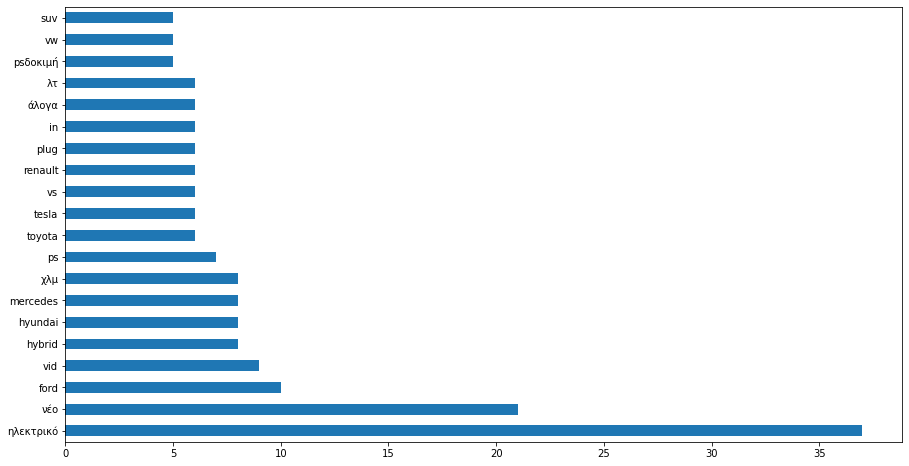

In [ ]:
results.sum(axis =0).sort_values(ascending = False).plot(kind="barh", figsize=(15, 8)) 

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bηλ[α-ω-ά-ω]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfAutotriti2['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

ηλεκτρίζει  ηλεκτρικές  ηλεκτρική  ...  ηλεκτρικο  ηλεκτροκίνηση  ηλεκτροκινηση
0           0           0          0  ...          0              0              0
1           0           0          0  ...          0              0              0
2           0           0          0  ...          0              0              0
3           0           0          0  ...          0              0              0
4           0           0          0  ...          0              0              0

[5 rows x 8 columns]

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bμπα[α-ω-ά-ω]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfAutotriti2['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

μπαταρίες
0          0
1          0
2          0
3          0
4          0

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfAutotriti2['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

audi tron  c5 aircross  ...  συνεργασίας υπέγραψε  υπέγραψε δεη
0          0            0  ...                     0             0
1          0            0  ...                     0             0
2          0            0  ...                     0             0
3          0            0  ...                     0             0
4          0            0  ...                     0             0

[5 rows x 20 columns]

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

νέο ηλεκτρικό           7
plug in                 6
ηλεκτρικό suv           4
mustang mach            4
υπέγραψε δεη            3
μνημόνιο συνεργασίας    3
λτ δοκιμή               3
δεη ελινοιλ             3
συνεργασίας υπέγραψε    3
mild hybrid             3
leon hybrid             2
c5 aircross             2
chargers εcofest        2
citroen c5              2
schneider electric      2
mazda mhev              2
εcofest 2021            2
νέο vw                  2
παγκόσμιες πωλήσεις     2
audi tron               2
dtype: int64

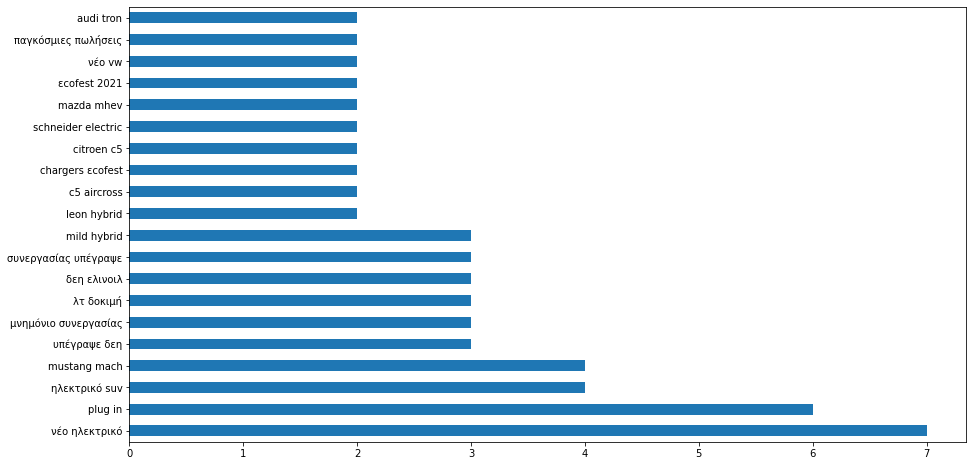

In [ ]:
results.sum(axis =0).sort_values(ascending = False).plot(kind="barh", figsize=(15, 8)) 

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
 #                    token_pattern = '(\\bκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b') )\| (\\bκυβ[α-ωά-ώ]\\b) #, tokenizer=my_tokenizer)
                     token_pattern = '\\bαυτ[α-ω-ά-ω]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfAutotriti2['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

αυτοκίνητα  αυτοκίνητα-ζομπι  αυτοκίνητο  ...  αυτονομία  αυτονομίας  αυτονομια
0           0                 0           0  ...          0           0          0
1           0                 0           0  ...          0           0          0
2           0                 0           0  ...          0           0          1
3           0                 0           0  ...          0           0          0
4           1                 0           0  ...          0           0          0

[5 rows x 7 columns]

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

αυτονομια           5
αυτονομία           4
αυτονομίας          1
αυτοματο            1
αυτοκίνητο          1
αυτοκίνητα-ζομπι    1
αυτοκίνητα          1
dtype: int64

11. Αξιοποιήστε την διανυσματοποίηση των κειμένων σας (CountVectorizer()), και τη χρήση της ομοιότητας κειμένων μέσω της συνάρτησης cosine_similarity() ώστε να βρείτε άρθρα που έχουν μεγάλη ομοιότητα. Παρουσιάστε τη συσχέτιση αυτή μέσω γραφήματος τύπου heatmap.

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['αυτονομία', 'μπαταρία', 'ηλεκτρικό', 'ηλεκτροκινητήρας', 'tesla', 'ηλεκτροκίνηση', 'υβριδικό', 'υδρογόνο', 'κινητήρας', 'καύσης', 'ΔΕΗ', 'φόρτιση']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfAutotriti2['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head(20)

αυτονομία  μπαταρία  ηλεκτρικό  ...  καύσης  ΔΕΗ  φόρτιση
0           0         0          0  ...       0    0        0
1           0         0          0  ...       0    0        0
2           0         0          1  ...       0    0        0
3           0         0          1  ...       0    0        0
4           0         0          0  ...       0    0        0
5           0         0          0  ...       0    0        0
6           0         0          0  ...       0    0        0
7           0         0          0  ...       0    0        0
8           0         0          0  ...       0    0        0
9           0         0          0  ...       0    0        0
10          0         0          0  ...       0    0        0
11          0         0          0  ...       0    0        0
12          0         0          0  ...       0    0        0
13          0         0          0  ...       0    0        0
14          0         0          0  ...       0    0        0
15          0         0          0  ...       0    0        0
16          0         0          0  ...       0    0        0
17          0         0          0  ...       0    0        0
18          0         0          0  ...       0    0        0
19          0         0          1  ...       0    0        0

[20 rows x 12 columns]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(dfAutotriti2['headline'])  #finds the tfidf score with normalization

In [ ]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

000   10  100  120  140  ...  χώρους  ψωμί       ωρα  ωραe  ωφέλιμο
0  0.000000  0.0  0.0  0.0  0.0  ...     0.0   0.0  0.000000   0.0      0.0
1  0.000000  0.0  0.0  0.0  0.0  ...     0.0   0.0  0.000000   0.0      0.0
2  0.000000  0.0  0.0  0.0  0.0  ...     0.0   0.0  0.345535   0.0      0.0
3  0.000000  0.0  0.0  0.0  0.0  ...     0.0   0.0  0.000000   0.0      0.0
4  0.354311  0.0  0.0  0.0  0.0  ...     0.0   0.0  0.000000   0.0      0.0

[5 rows x 500 columns]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.         0.         0.         0.         0.
  0.         0.         0.         0.09523338 0.         0.
  0.         0.         0.         0.         0.08916569 0.
  0.         0.         0.         0.10319653 0.         0.10109157
  0.11234286 0.         0.         0.         0.09328598 0.
  0.         0.10650072 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.10697821 0.         0.34345983 0.06373724 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.09104553 0.
  0.07257721 0.         0.         0.         0.         0.
  0.         0.         0.         0.13820957 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.11734608
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0. 

In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)) 

cosine scores ==>  [[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.13147919 0.        ]
 [0.         0.         1.         ... 0.         0.05883639 0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.07696135]
 [0.         0.13147919 0.05883639 ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.07696135 0.         1.        ]]


In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

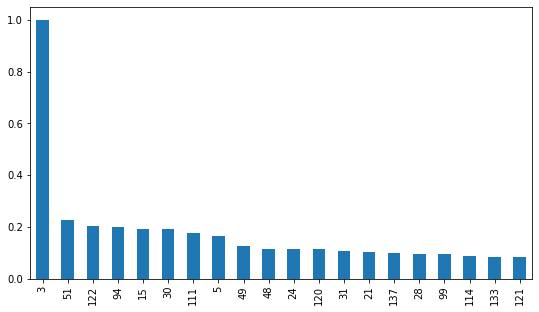

In [ ]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar', figsize = [9,5])

#6. Να πραγματοποιήσετε αναλύσεις στα αριθμητικά δεδομένα σας και να δημιουργήσετε τα αντίστοιχα γραφήματα, τα οποία δείχνουν χαρακτηριστικά και συσχετίσεις που κρύβουν τα δεδομένα σας.

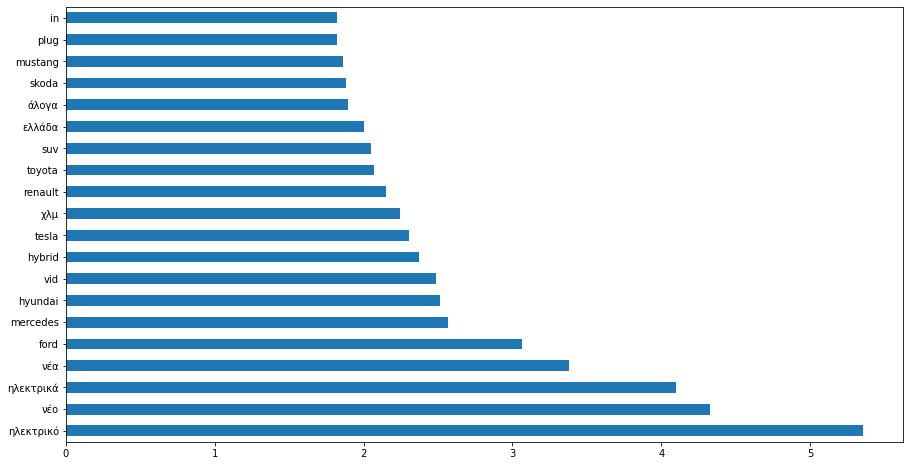

In [ ]:
results.sum(axis =0).sort_values(ascending = False).head(20).plot(kind="barh", figsize=(15, 8)) 

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bηλ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfAutotriti2['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

ηλεκτρίζει  ηλεκτρικά  ηλεκτρικές  ...  ηλεκτρικών  ηλεκτροκίνηση  ηλεκτροκινηση
0           0          0           0  ...           0              0              0
1           0          0           0  ...           0              0              0
2           0          0           0  ...           0              0              0
3           0          0           0  ...           0              0              0
4           0          1           0  ...           0              0              0

[5 rows x 13 columns]

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfAutotriti2['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

audi tron  c5 aircross  ...  συνεργασίας υπέγραψε  υπέγραψε δεη
0          0            0  ...                     0             0
1          0            0  ...                     0             0
2          0            0  ...                     0             0
3          0            0  ...                     0             0
4          0            0  ...                     0             0

[5 rows x 20 columns]

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

plug in                 6
νέο ηλεκτρικό           5
mustang mach            4
ηλεκτρικό suv           4
υπέγραψε δεη            3
νέα ηλεκτρικά           3
μνημόνιο συνεργασίας    3
λτ δοκιμή               3
δεη ελινοιλ             3
συνεργασίας υπέγραψε    3
mild hybrid             3
c5 aircross             2
chargers εcofest        2
hybrid λτ               2
vw id                   2
skoda enyaq             2
toyota bz4x             2
δοκιμή υβριδικό         2
παγκόσμιες πωλήσεις     2
audi tron               2
dtype: int64

Διάγραμμα με τις 20 συχνότερες φράσεις

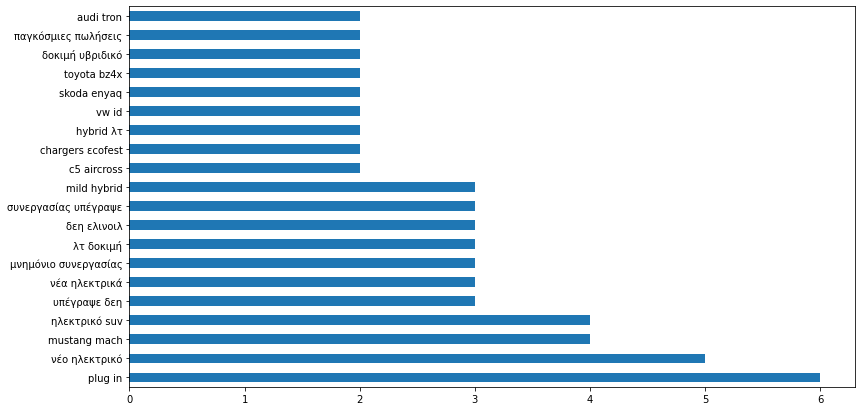

In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(20).plot(kind="barh", figsize=(13, 7)) 

#9 Κάνοντας χρήση του ελληνικού λεξικού για sentiment anaysis του NRC βρείτε την πολικότητα (θετική - αρνητική) και τα συναισθήματα των κειμένων σας, και αποθηκεύστε τα σε νέες στήλες στο dataframe των δεδομένων σας.

In [ ]:
import spacy
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
dfAutotriti2Headline = dfAutotriti2['headline'].str.cat(sep = ' ').replace("amp", '')


In [ ]:
dfAutotriti2Headline

'ΟΔΗΓΟΥΜΕ ΤΟ ΗΛΕΚΤΡΙΚΟΟδηγούμε το νέο Hyundai Ioniq 5 Οι τιμές της Ford Mustang Mach-E στην Ελλάδα  ΦΟΡΤΙΣΗ ΣΕ 1 ΩΡΑ & ΑΥΤΟΝΟΜΙΑ 400 ΧΛΜ.Εντυπωσιάζει το ηλεκτρικό Mercedes eActros (+vid) To 2021 στην αγορά το ηλεκτρικό Dacia Αντέχει 350.000 ηλεκτρικό αυτοκίνητα το δίκτυο της Ελλάδας ΗΛΕΚΤΡΙΚΟ & VALUE FOR MONEY!To Maxus eDeliver 9 σας «βάζει στην πρίζα»!  EVziiin και Schneider Electric: Σχέση αγάπης με το περιβάλλον ΥΒΡΙΔΙΚΟ ΠΟΥ ΚΑΙΕΙ ΜΟΛΙΣ 5,1 ΛΤ.Δοκιμή: Το υβριδικό Jazz καίει μόλις 5,1 λίτρα! ΥΒΡΙΔΙΚΟ ΜΕ 140 PS, «ΚΑΙΕΙ» 5,3 ΛΤ.Δοκιμή: Υβριδικό Renault Clio E-Tech με 140 PS ΠΟΙΟ ΔΙΑΛΕΓΕΙΣ ΜΕ ΣΧΕΔΟΝ 200PS;Hyundai Kona Vs Toyota C-HR ΜΕ 240 ΑΛΟΓΑ & ΚΑΤΑΝΑΛΩΣΗ 6 ΛΤ.Δοκιμή: Jeep Compass 4xe | Με 240 άλογα & κατανάλωση 6λτ.! Πρεμιέρα για τη νέο Ferrari 296 GTB με 830 ίππους! Plug-in hybrid: Μαγκιά, λύση ή «άκυρα»; SCANIA, MAN & VOLVOΔιανομές με ηλεκτρικό φορτηγά (+vids) ΑΚΡΑΙΕΣ ΔΟΚΙΜΕΣ ΕΞΕΛΙΞΗΣΤα «βασανιστήρια» του Ford E-Transit (+vid) Διπλή παρουσία της MC CHARGERS στο Εcofest 2021! MILD 

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
list(nlp.Defaults.stop_words)[0:10]

['μερικές',
 'συχνός',
 'έχοντας',
 'συν',
 'ίδιος',
 'ταύτης',
 'τούτα',
 'γύρω',
 'οποιονδήποτε',
 'ίδιαν']

In [ ]:
dfAutotriti2doc = nlp(dfAutotriti2['headline'][1])

In [ ]:
dfAutotriti2doc

Οι τιμές της Ford Mustang Mach-E στην Ελλάδα 

In [ ]:
for token in dfAutotriti2doc:
    print(token, token.lemma_)

Οι οι
τιμές τιμή
της της
Ford ford
Mustang mustang
Mach-E mach-e
στην στην
Ελλάδα Ελλάδα


In [ ]:
dfAutotriti2Headline

'ΟΔΗΓΟΥΜΕ ΤΟ ΗΛΕΚΤΡΙΚΟΟδηγούμε το νέο Hyundai Ioniq 5 Οι τιμές της Ford Mustang Mach-E στην Ελλάδα  ΦΟΡΤΙΣΗ ΣΕ 1 ΩΡΑ & ΑΥΤΟΝΟΜΙΑ 400 ΧΛΜ.Εντυπωσιάζει το ηλεκτρικό Mercedes eActros (+vid) To 2021 στην αγορά το ηλεκτρικό Dacia Αντέχει 350.000 ηλεκτρικό αυτοκίνητα το δίκτυο της Ελλάδας ΗΛΕΚΤΡΙΚΟ & VALUE FOR MONEY!To Maxus eDeliver 9 σας «βάζει στην πρίζα»!  EVziiin και Schneider Electric: Σχέση αγάπης με το περιβάλλον ΥΒΡΙΔΙΚΟ ΠΟΥ ΚΑΙΕΙ ΜΟΛΙΣ 5,1 ΛΤ.Δοκιμή: Το υβριδικό Jazz καίει μόλις 5,1 λίτρα! ΥΒΡΙΔΙΚΟ ΜΕ 140 PS, «ΚΑΙΕΙ» 5,3 ΛΤ.Δοκιμή: Υβριδικό Renault Clio E-Tech με 140 PS ΠΟΙΟ ΔΙΑΛΕΓΕΙΣ ΜΕ ΣΧΕΔΟΝ 200PS;Hyundai Kona Vs Toyota C-HR ΜΕ 240 ΑΛΟΓΑ & ΚΑΤΑΝΑΛΩΣΗ 6 ΛΤ.Δοκιμή: Jeep Compass 4xe | Με 240 άλογα & κατανάλωση 6λτ.! Πρεμιέρα για τη νέο Ferrari 296 GTB με 830 ίππους! Plug-in hybrid: Μαγκιά, λύση ή «άκυρα»; SCANIA, MAN & VOLVOΔιανομές με ηλεκτρικό φορτηγά (+vids) ΑΚΡΑΙΕΣ ΔΟΚΙΜΕΣ ΕΞΕΛΙΞΗΣΤα «βασανιστήρια» του Ford E-Transit (+vid) Διπλή παρουσία της MC CHARGERS στο Εcofest 2021! MILD 

In [ ]:
' '.join(token.lemma_ for token in dfAutotriti2doc)

'οι τιμή της ford mustang mach-e στην Ελλάδα'

In [ ]:
AutotritiFull = nlp(dfAutotriti2Headline)

In [ ]:
AutotritiClear = ' '.join(token.lemma_ for token in AutotritiFull)

In [ ]:
AutotritiClear

'οδηγουμε το ηλεκτρικοοδηγούμε το νέος hyundai ioniq 5 οι τιμή της ford mustang mach-e στην Ελλάδα   φορτιση σε 1 ωρας & ΑΥΤΟΝΟΜΙΑ 400 χλμ.εντυπωσιάζω το ηλεκτρικό mercedes eactros ( +vid ) to 2021 στην αγορά το ηλεκτρικό dacia αντέχω 350.000 ηλεκτρικό αυτοκίνητο το δίκτυο της Ελλάδας ηλεκτρικο & value for money!to maxus edeliver 9 σας « βάζω στην πρίζα » !   evziiin και schneider electric : σχέση αγάπη με το περιβάλλον υβριδικο που καιει μολι 5,1 λτ.δοκιμή : το υβριδικό jazz καίω μόλις 5,1 λίτρα ! υβριδικο με 140 ps , « καιει » 5,3 λτ.δοκιμή : υβριδικό renault clio e-tech με 140 ps ποιο διαλεγει με σχεδον 200ps;hyundai kona vs toyota c-hr με 240 αλογας & καταναλωση 6 λτ.δοκιμή : jeep compass 4xe | με 240 άλογο & κατανάλωση 6λτ . ! Πρεμιέρα για τη νέος ferrari 296 gtb με 830 ίππους ! plug-in hybrid : Μαγκιά , λύση ή « άκυρας » ; scania , man & volvoδιανομές με ηλεκτρικό φορτηγά ( +vids ) ακραιες δοκιμα εξελιξηστας « βασανιστήρια » του ford e-transit ( +vid ) διπλή παρουσία της mc charg

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
count_vector = cv.fit_transform(dfAutotriti2['headline'])

In [ ]:
count_vector.shape

(139, 607)

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

000  10  100  120  140  155  165  ...  ωραe  ως  ωφέλιμο  όλα  όλη  όμιλο  όσο
0    0   0    0    0    0    0    0  ...     0   0        0    0    0      0    0
1    0   0    0    0    0    0    0  ...     0   0        0    0    0      0    0
2    0   0    0    0    0    0    0  ...     0   0        0    0    0      0    0
3    0   0    0    0    0    0    0  ...     0   0        0    0    0      0    0
4    1   0    0    0    0    0    0  ...     0   0        0    0    0      0    0

[5 rows x 607 columns]

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [ ]:
count_vector = cv.fit_transform(dfAutotriti2['headline'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head(20)

000  10  100  120  2021  ...  υβριδικό  υπέγραψε  φορτιση  χλμ  ωρα
0     0   0    0    0     0  ...         0         0        0    0    0
1     0   0    0    0     0  ...         0         0        0    0    0
2     0   0    0    0     0  ...         0         0        1    1    1
3     0   0    0    0     1  ...         0         0        0    0    0
4     1   0    0    0     0  ...         0         0        0    0    0
5     0   0    0    0     0  ...         0         0        0    0    0
6     0   0    0    0     0  ...         0         0        0    0    0
7     0   0    0    0     0  ...         1         0        0    0    0
8     0   0    0    0     0  ...         1         0        0    0    0
9     0   0    0    0     0  ...         0         0        0    0    0
10    0   0    0    0     0  ...         0         0        0    0    0
11    0   0    0    0     0  ...         0         0        0    0    0
12    0   0    0    0     0  ...         0         0        0    0    0
13    0   0    0    0     0  ...         0         0        0    0    0
14    0   0    0    0     0  ...         0         0        0    0    0
15    0   0    0    0     1  ...         0         0        0    0    0
16    0   0    0    2     0  ...         1         0        0    0    0
17    0   0    0    0     0  ...         0         0        0    0    0
18    0   0    0    0     0  ...         0         0        0    0    0
19    0   0    1    0     0  ...         0         0        0    1    1

[20 rows x 124 columns]

In [ ]:
from html import unescape
def my_tokenizer(dfAutotriti2doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(dfAutotriti2doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [ ]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(dfAutotriti2['headline'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπο', 'αλλιώτικο', 'αλλοιώτικας', 'αφότο', 'βεβαιότατας', 'γρήγορο', 'δίχω', 'εαυτής', 'εκάστα', 'εκάστο', 'ετού', 'ευθύ', 'εχτή', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνε', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιώ', 'πολλός', 'προχθέ', 'προχτέ', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'τούτε', 'όποι'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


+vid  +vids  1,0  120  2021  ...  υβριδικό  υπέγραψε  φορτιση  χλμ.  ωρα
0     0      0    0    0     0  ...         0         0        0     0    0
1     0      0    0    0     0  ...         0         0        0     0    0
2     1      0    0    0     0  ...         0         0        1     0    1
3     0      0    0    0     1  ...         0         0        0     0    0
4     0      0    0    0     0  ...         0         0        0     0    0

[5 rows x 109 columns]

In [ ]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(dfAutotriti2['headline'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπο', 'αλλιώτικο', 'αλλοιώτικας', 'αφότο', 'βεβαιότατας', 'γρήγορο', 'δίχω', 'εαυτής', 'εκάστα', 'εκάστο', 'ετού', 'ευθύ', 'εχτή', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνε', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιώ', 'πολλός', 'προχθέ', 'προχτέ', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'τούτε', 'όποι'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


+vid  ford  hybrid  hyundai  ...  ηλεκτρικό  ηλεκτρικός  νέος  παραγωγή
0     0     0       0        1  ...          0           0     1         0
1     0     1       0        0  ...          0           0     0         0
2     1     0       0        0  ...          1           0     0         0
3     0     0       0        0  ...          1           0     0         0
4     0     0       0        0  ...          1           0     0         0

[5 rows x 20 columns]

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bηλ[α-ωά-ώ]*\\b', tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfAutotriti2['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπο', 'αλλιώτικο', 'αλλοιώτικας', 'αφότο', 'βεβαιότατας', 'γρήγορο', 'δίχω', 'εαυτής', 'εκάστα', 'εκάστο', 'ετού', 'ευθύ', 'εχτή', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνε', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιώ', 'πολλός', 'προχθέ', 'προχτέ', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'τούτε', 'όποι'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


+vid  ford  hybrid  hyundai  ...  ηλεκτρικό  ηλεκτρικός  νέος  παραγωγή
0     0     0       0        1  ...          0           0     1         0
1     0     1       0        0  ...          0           0     0         0
2     1     0       0        0  ...          1           0     0         0
3     0     0       0        0  ...          1           0     0         0
4     0     0       0        0  ...          1           0     0         0

[5 rows x 20 columns]

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2), token_pattern = '\\bηλ[α-ωά-ώ]*\\b', tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfAutotriti2['headline'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπο', 'αλλιώτικο', 'αλλοιώτικας', 'αφότο', 'βεβαιότατας', 'γρήγορο', 'δίχω', 'εαυτής', 'εκάστα', 'εκάστο', 'ετού', 'ευθύ', 'εχτή', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνε', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιώ', 'πολλός', 'προχθέ', 'προχτέ', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'τούτε', 'όποι'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


audi e-tron  ford mustang  ...  υπέγραψε δεη  φορτιση ωρα
0            0             0  ...             0            0
1            0             1  ...             0            0
2            0             0  ...             0            1
3            0             0  ...             0            0
4            0             0  ...             0            0

[5 rows x 20 columns]

In [ ]:
results.sum(axis =0).sort_values(ascending = False)

νέος ηλεκτρικό         8
ηλεκτρικό suv          4
mustang mach-e         4
μνημόνιο συνεργασία    3
mild hybrid            3
δεη ελινοιλ            3
υπέγραψε δεη           3
audi e-tron            3
συνεργασία υπέγραψε    3
λτ.δοκιμή υβριδικό     2
κοντράρω tesla         2
μοντέλος παραγωγή      2
νέος έκδοση            2
tesla model            2
schneider electric     2
παρουσία chargers      2
mazda mhev             2
leon e-hybrid          2
ford mustang           2
φορτιση ωρα            2
dtype: int64

In [ ]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(17)   

νέος ηλεκτρικό         8
ηλεκτρικό suv          4
mustang mach-e         4
μνημόνιο συνεργασία    3
mild hybrid            3
δεη ελινοιλ            3
υπέγραψε δεη           3
audi e-tron            3
συνεργασία υπέγραψε    3
λτ.δοκιμή υβριδικό     2
κοντράρω tesla         2
μοντέλος παραγωγή      2
νέος έκδοση            2
tesla model            2
schneider electric     2
παρουσία chargers      2
mazda mhev             2
dtype: int64

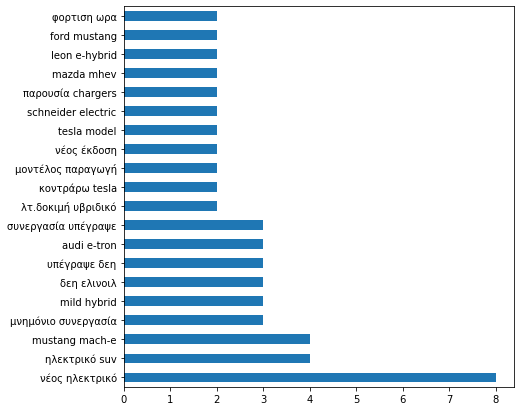

In [ ]:
sum_words.sort_values(ascending = False).head(20).plot(kind = 'barh', figsize=(7,7))

In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  ...  Joy  Sadness  Surprise  Trust
0            αφεση       1.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
1  ενορκη βεβαιωση       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
2          εχοντας       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
3              εχω       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
4             οριο       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 11 columns]

In [ ]:
emolex_df.tail()

word  Positive  Negative  Anger  ...  Joy  Sadness  Surprise  Trust
13166     ουρλιασμα       0.0       1.0    1.0  ...  0.0      0.0       1.0    0.0
13167  κροκος αυγου       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13168      νεοτερος       1.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13169       ζεφυρος       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13170          ζουμ       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 11 columns]

In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [ ]:
emolex_df.tail()

index          word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
13156  13166     ουρλιασμα       0.0       1.0  ...  0.0      0.0       1.0    0.0
13157  13167  κροκος αυγου       0.0       0.0  ...  0.0      0.0       0.0    0.0
13158  13168      νεοτερος       1.0       0.0  ...  0.0      0.0       0.0    0.0
13159  13169       ζεφυρος       0.0       0.0  ...  0.0      0.0       0.0    0.0
13160  13170          ζουμ       0.0       0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 12 columns]

In [ ]:
nlp = spacy.load("el_core_news_sm")

In [ ]:
dfAutotriti2

headline       date
0    ΟΔΗΓΟΥΜΕ ΤΟ ΗΛΕΚΤΡΙΚΟΟδηγούμε το νέο Hyundai I...   2/7/2021
1        Οι τιμές της Ford Mustang Mach-E στην Ελλάδα    2/7/2021
2    ΦΟΡΤΙΣΗ ΣΕ 1 ΩΡΑ & ΑΥΤΟΝΟΜΙΑ 400 ΧΛΜ.Εντυπωσιά...       None
3                To 2021 στην αγορά το ηλεκτρικό Dacia  17/2/2020
4    Αντέχει 350.000 ηλεκτρικό αυτοκίνητα το δίκτυο...  29/1/2020
..                                                 ...        ...
134          SEAT Leon e-Hybrid ή CUPRA Leon e-Hybrid;  28/5/2021
135  Πως Ford & Hyundai κοντράρουν την Tesla καλύτε...  27/5/2021
136            Νέα έκδοση Bronze του Toyota Highlander  27/5/2021
137  Tο ηλεκτρικό μέλλον της Ford περιλαμβάνει και ...  27/5/2021
138  ΣΥΜΒΑΤΙΚΕΣ & ΗΛΕΚΤΡΙΚΕΣ ΕΚΔΟΣΕΙΣΈρχονται τα νέ...        NaN

[139 rows x 2 columns]

In [ ]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [ ]:
dfAutotriti2['headline'] = dfAutotriti2['headline'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# Θέλω να ελέγξω μόνο τις λέξεις που υπάρχουν στο συναισθηματικό λεξικό

#CountVectorizer(analyzer = 'word', 
                #strip_accents = 'unicode', 
                #token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}', 
                #stop_words= lc_stop_words_df['stop_w'].tolist())


matrix = vec.fit_transform(dfAutotriti2['headline'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 

αφεση  ενορκη βεβαιωση  εχοντας  εχω  ...  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ
0      0                0        0    0  ...             0         0        0     0
1      0                0        0    0  ...             0         0        0     0
2      0                0        0    0  ...             0         0        0     0
3      0                0        0    0  ...             0         0        0     0
4      0                0        0    0  ...             0         0        0     0

[5 rows x 13161 columns]

In [ ]:
wordcount_df.shape

(139, 13161)

In [ ]:
emolex_df.head()

index             word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
0      0            αφεση       1.0       0.0  ...  0.0      0.0       0.0    0.0
1      1  ενορκη βεβαιωση       0.0       0.0  ...  0.0      0.0       0.0    0.0
2      2          εχοντας       0.0       0.0  ...  0.0      0.0       0.0    0.0
3      3              εχω       0.0       0.0  ...  0.0      0.0       0.0    0.0
4      4             οριο       0.0       0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 12 columns]

In [ ]:
emolex_df[emolex_df.Anger == 1].tail()

index          word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
13094  13104      διεξοδος       0.0       0.0  ...  0.0      0.0       0.0    0.0
13096  13106        ζωυφια       0.0       1.0  ...  0.0      0.0       0.0    0.0
13100  13110    θυματοποιω       0.0       1.0  ...  0.0      1.0       1.0    0.0
13128  13138  αποτυχημενος       0.0       1.0  ...  0.0      0.0       0.0    0.0
13156  13166     ουρλιασμα       0.0       1.0  ...  0.0      0.0       1.0    0.0

[5 rows x 12 columns]

In [ ]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [ ]:
dfAutotriti2.head(3)

headline      date
0  ΟΔΗΓΟΥΜΕ ΤΟ ΗΛΕΚΤΡΙΚΟΟδηγούμε το νέο Hyundai I...  2/7/2021
1      Οι τιμές της Ford Mustang Mach-E στην Ελλάδα   2/7/2021
2  ΦΟΡΤΙΣΗ ΣΕ 1 ΩΡΑ & ΑΥΤΟΝΟΜΙΑ 400 ΧΛΜ.Εντυπωσιά...      None

In [ ]:
dfAutotriti2['anger'] = wordcount_df[angry_words].sum(axis=1)

dfAutotriti2['positivity'] = wordcount_df[positive_words].sum(axis=1)

dfAutotriti2['joy'] = wordcount_df[joy_words].sum(axis=1)

dfAutotriti2['disgust'] = wordcount_df[disgust_words].sum(axis=1)

dfAutotriti2['surprise'] = wordcount_df[surprise_words].sum(axis=1)

dfAutotriti2['trust'] = wordcount_df[trust_words].sum(axis=1)

dfAutotriti2['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

dfAutotriti2['sadness'] = wordcount_df[sadness_words].sum(axis=1)

dfAutotriti2['negative'] = wordcount_df[negative_words].sum(axis=1)

dfAutotriti2['fear'] = wordcount_df[fear_words].sum(axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [ ]:
dfAutotriti2

headline  ... fear
0    ΟΔΗΓΟΥΜΕ ΤΟ ΗΛΕΚΤΡΙΚΟΟδηγούμε το νέο Hyundai I...  ...    0
1        Οι τιμές της Ford Mustang Mach-E στην Ελλάδα   ...    0
2    ΦΟΡΤΙΣΗ ΣΕ 1 ΩΡΑ & ΑΥΤΟΝΟΜΙΑ 400 ΧΛΜ.Εντυπωσιά...  ...    1
3                To 2021 στην αγορά το ηλεκτρικό Dacia  ...    0
4    Αντέχει 350.000 ηλεκτρικό αυτοκίνητα το δίκτυο...  ...    0
..                                                 ...  ...  ...
134          SEAT Leon e-Hybrid ή CUPRA Leon e-Hybrid;  ...    0
135  Πως Ford & Hyundai κοντράρουν την Tesla καλύτε...  ...    0
136            Νέα έκδοση Bronze του Toyota Highlander  ...    0
137  Tο ηλεκτρικό μέλλον της Ford περιλαμβάνει και ...  ...    0
138  ΣΥΜΒΑΤΙΚΕΣ & ΗΛΕΚΤΡΙΚΕΣ ΕΚΔΟΣΕΙΣΈρχονται τα νέ...  ...    0

[139 rows x 12 columns]

#8 Κάνω την ημερομηνία index

In [ ]:
dfAutotriti2['date'] =  pd.to_datetime(dfAutotriti2['date'])

In [ ]:
dfAutotriti2.set_index('date', inplace=True)

In [ ]:
dfAutotriti2

headline  ...  fear
date                                                           ...      
2021-02-07  ΟΔΗΓΟΥΜΕ ΤΟ ΗΛΕΚΤΡΙΚΟΟδηγούμε το νέο Hyundai I...  ...     0
2021-02-07      Οι τιμές της Ford Mustang Mach-E στην Ελλάδα   ...     0
NaT         ΦΟΡΤΙΣΗ ΣΕ 1 ΩΡΑ & ΑΥΤΟΝΟΜΙΑ 400 ΧΛΜ.Εντυπωσιά...  ...     1
2020-02-17              To 2021 στην αγορά το ηλεκτρικό Dacia  ...     0
2020-01-29  Αντέχει 350.000 ηλεκτρικό αυτοκίνητα το δίκτυο...  ...     0
...                                                       ...  ...   ...
2021-05-28          SEAT Leon e-Hybrid ή CUPRA Leon e-Hybrid;  ...     0
2021-05-27  Πως Ford & Hyundai κοντράρουν την Tesla καλύτε...  ...     0
2021-05-27            Νέα έκδοση Bronze του Toyota Highlander  ...     0
2021-05-27  Tο ηλεκτρικό μέλλον της Ford περιλαμβάνει και ...  ...     0
NaT         ΣΥΜΒΑΤΙΚΕΣ & ΗΛΕΚΤΡΙΚΕΣ ΕΚΔΟΣΕΙΣΈρχονται τα νέ...  ...     0

[139 rows x 11 columns]

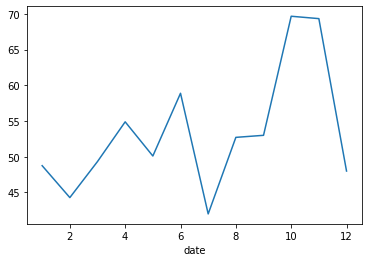

In [ ]:
dfAutotriti2['headline'].str.len().groupby(by=dfAutotriti2.index.month).mean().plot()

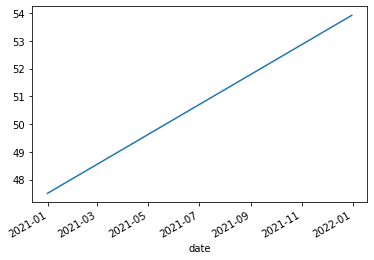

In [ ]:
dfAutotriti2['headline'].str.len().resample('A').mean().plot() 

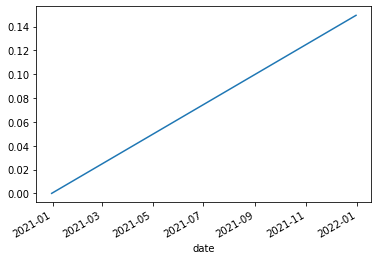

In [ ]:
dfAutotriti2['positivity'].resample('A').mean().plot() 

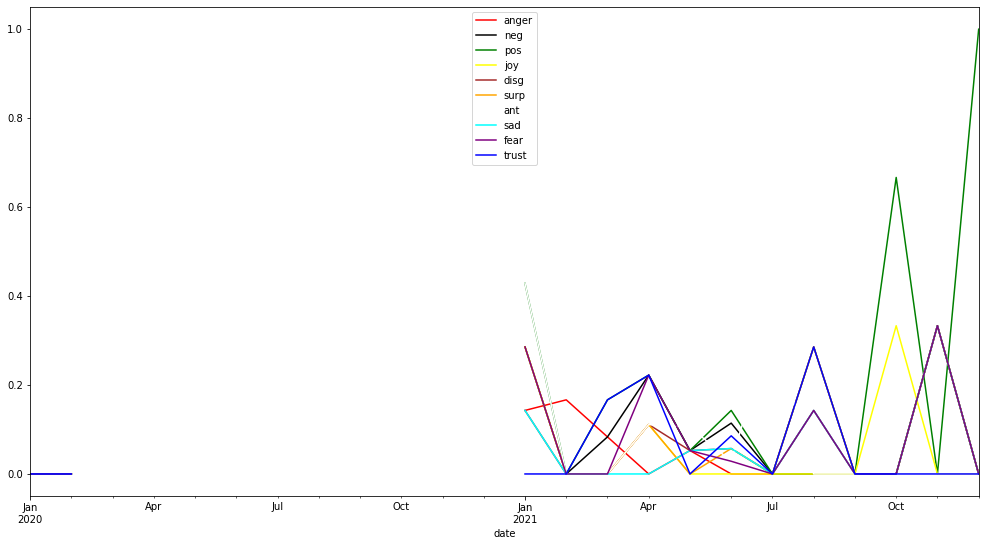

In [ ]:
ax = dfAutotriti2['anger'].resample('M').mean().plot(figsize=(16,7), 
                                                          color = 'red', label='anger')

dfAutotriti2['negative'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'neg', color = 'black')

dfAutotriti2['positivity'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'pos', color = 'green')

dfAutotriti2['joy'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'joy', color = 'yellow')

dfAutotriti2['disgust'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'disg', color = 'brown')

dfAutotriti2['surprise'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'surp', color = 'orange')

dfAutotriti2['anticipation'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'ant', color = 'white')

dfAutotriti2['sadness'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'sad', color = 'cyan')

dfAutotriti2['fear'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                   label = 'fear', color = 'purple')

dfAutotriti2['trust'].resample('M').mean().plot(figsize=(17,9), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

In [ ]:
dfAutotriti2[['anger','positivity','joy','disgust','surprise','trust','anticipation','sadness','negative','fear']].sum()

anger            7
positivity      23
joy              5
disgust          8
surprise         9
trust           11
anticipation    12
sadness          8
negative        19
fear            13
dtype: int64

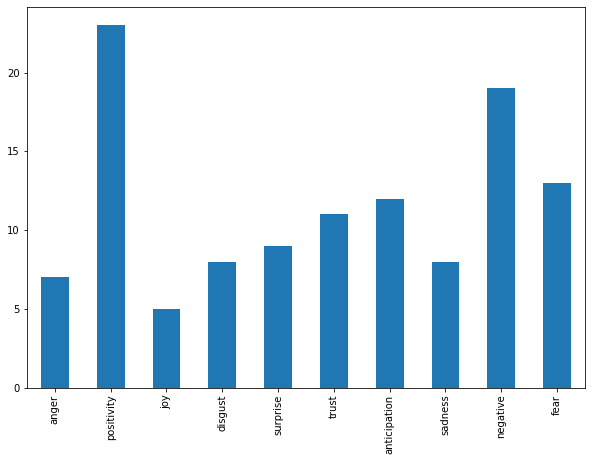

In [ ]:
dfAutotriti2[['anger','positivity','joy','disgust','surprise','trust','anticipation','sadness','negative','fear']].sum().plot(kind = 'bar', figsize=(10,7))

#Πάμε τώρα να κάνουμε ανάλυση των σχολίων

In [14]:
dfAutotriti

headline  ...       date
0    ΟΔΗΓΟΥΜΕ ΤΟ ΗΛΕΚΤΡΙΚΟΟδηγούμε το νέο Hyundai I...  ...   2/7/2021
1        Οι τιμές της Ford Mustang Mach-E στην Ελλάδα   ...   2/7/2021
2    ΦΟΡΤΙΣΗ ΣΕ 1 ΩΡΑ & ΑΥΤΟΝΟΜΙΑ 400 ΧΛΜ.Εντυπωσιά...  ...       None
3                To 2021 στην αγορά το ηλεκτρικό Dacia  ...  17/2/2020
4    Αντέχει 350.000 ηλεκτρικά αυτοκίνητα το δίκτυο...  ...  29/1/2020
..                                                 ...  ...        ...
134          SEAT Leon e-Hybrid ή CUPRA Leon e-Hybrid;  ...  28/5/2021
135  Πως Ford & Hyundai κοντράρουν την Tesla καλύτε...  ...  27/5/2021
136            Νέα έκδοση Bronze του Toyota Highlander  ...  27/5/2021
137  Tο ηλεκτρικό μέλλον της Ford περιλαμβάνει και ...  ...  27/5/2021
138  ΣΥΜΒΑΤΙΚΕΣ & ΗΛΕΚΤΡΙΚΕΣ ΕΚΔΟΣΕΙΣΈρχονται τα νέ...  ...        NaN

[139 rows x 6 columns]

Καταρχάς πρέπει να αφαιρέσουμε τις γραμμές που δεν έχουν σχόλια

In [15]:
dfAutotriti['Coomments'].str.contains('NO COMMENTS')

0      False
1       True
2       True
3      False
4       True
       ...  
134     True
135     True
136     True
137     True
138     True
Name: Coomments, Length: 139, dtype: bool

In [16]:
dfAutotriti['Coomments'] = dfAutotriti['Coomments'].str.replace("ηλεκτρικών", "ηλεκτρικό")
dfAutotriti['Coomments'] = dfAutotriti['Coomments'].str.replace("ηλεκτρικά", "ηλεκτρικό")
dfAutotriti['Coomments'] = dfAutotriti['Coomments'].str.replace("ηλεκτρικός", "ηλεκτρικό")
dfAutotriti['Coomments'] = dfAutotriti['Coomments'].str.replace("νέα", "νέο")
dfAutotriti['Coomments'] = dfAutotriti['Coomments'].str.replace("νέων", "νέο")
dfAutotriti['Coomments'] = dfAutotriti['Coomments'].str.replace("αυτοκίνητα", "αυτοκίνητο")
dfAutotriti['Coomments'] = dfAutotriti['Coomments'].str.replace("αυτοκινήτων", "αυτοκίνητο")
dfAutotriti['Coomments'] = dfAutotriti['Coomments'].str.replace("φυσικού", "φυσικό")
dfAutotriti['Coomments'] = dfAutotriti['Coomments'].str.replace("αερίου", "αέριο")
dfAutotriti['Coomments'] = dfAutotriti['Coomments'].str.replace("χιλιόμετρα", "χλμ")
dfAutotriti['Coomments'] = dfAutotriti['Coomments'].str.replace("τιμής", "τιμή")
dfAutotriti['Coomments'] = dfAutotriti['Coomments'].str.replace("τιμών", "τιμή")
dfAutotriti['Coomments'] = dfAutotriti['Coomments'].str.replace("χρόνου", "χρόνος")
dfAutotriti['Coomments'] = dfAutotriti['Coomments'].str.replace("χρόνων", "χρόνος")
dfAutotriti['Coomments'] = dfAutotriti['Coomments'].str.replace("μοντέλα", "μοντέλο")
dfAutotriti['Coomments'] = dfAutotriti['Coomments'].str.replace("μοντέλων", "μοντέλο")

In [17]:
searchfor = ['NO COMMENTS']
dfAutotriti['Coomments'] = dfAutotriti['Coomments'][~dfAutotriti['Coomments'].str.contains('|'.join(searchfor))]

In [18]:
dfAutotriti

headline  ...       date
0    ΟΔΗΓΟΥΜΕ ΤΟ ΗΛΕΚΤΡΙΚΟΟδηγούμε το νέο Hyundai I...  ...   2/7/2021
1        Οι τιμές της Ford Mustang Mach-E στην Ελλάδα   ...   2/7/2021
2    ΦΟΡΤΙΣΗ ΣΕ 1 ΩΡΑ & ΑΥΤΟΝΟΜΙΑ 400 ΧΛΜ.Εντυπωσιά...  ...       None
3                To 2021 στην αγορά το ηλεκτρικό Dacia  ...  17/2/2020
4    Αντέχει 350.000 ηλεκτρικά αυτοκίνητα το δίκτυο...  ...  29/1/2020
..                                                 ...  ...        ...
134          SEAT Leon e-Hybrid ή CUPRA Leon e-Hybrid;  ...  28/5/2021
135  Πως Ford & Hyundai κοντράρουν την Tesla καλύτε...  ...  27/5/2021
136            Νέα έκδοση Bronze του Toyota Highlander  ...  27/5/2021
137  Tο ηλεκτρικό μέλλον της Ford περιλαμβάνει και ...  ...  27/5/2021
138  ΣΥΜΒΑΤΙΚΕΣ & ΗΛΕΚΤΡΙΚΕΣ ΕΚΔΟΣΕΙΣΈρχονται τα νέ...  ...        NaN

[139 rows x 6 columns]

In [19]:
dfAutotriti['Coomments'] = dfAutotriti['Coomments'].str.replace(r'https?:\/\/.*[\r\n]*',"")

In [20]:
dfAutotriti['Coomments']

0      Θεωρώ ότι τα επόμενα (λίγα) χρόνια η εξέλιξη τ...
1                                                    NaN
2                                                    NaN
3          Να μια καλη ειδηση! Ηλεκτρικο απο 11000 ευρω!
4                                                    NaN
                             ...                        
134                                                  NaN
135                                                  NaN
136                                                  NaN
137                                                  NaN
138                                                  NaN
Name: Coomments, Length: 139, dtype: object

In [21]:
CommentsText = dfAutotriti['Coomments'].str.cat(sep = ' ').replace("amp", ' ')

In [22]:
CommentsText

'Θεωρώ ότι τα επόμενα (λίγα) χρόνια η εξέλιξη των ηλεκτρικό θα είναι αντίστοιχη αυτή των «σμαρτφόν». Βέβαια, στο αυτοκίνητο εμπλέκονται ιδιαίτερα κ οι νόμοι της φυσικής, μηχανικής, κ πολλοί, πολλοί, άλλοι. \nΤο συγκεκριμένο μοντέλο δείχνει νεανικό, κ προφανώς είναι ανταγωνιστικό σε μια κατηγορία που προσωπικά δεν μπορώ ακόμα να εμπιστευτώ (ιδίως σε μια χώρα σαν την Ελλάδα), κ μάλλον δεν στοχεύει εμένα. \nΑς μη σταθώ στη ΠΡΑΓΜΑΤΙΚΗ αυτονομία που είναι η πιο γνωστή αχίλλειος πτέρνα (clima, 3 άτομα, 130-140χλμ/ώρα εθνική), αλλά, σε μικρομεσαίο όχημα με βάρος 2,2 τόνων: \nα) Πόσο αντέχει στις κακοτεχνίες των δρόμων σε βάθος 5ετιας, β) ποιότητα συναρμογής κ υλικών καθότι διέπονται από άλλη κατασκευαστική φιλοσοφία κ απευθύνονται σε καταναλωτές με μάλλον (ίσως να κάνω λαθος) λιγότερες απαιτήσεις (?). γ) απόσταση ακινητοποίησης 100-0 μετά από έντονη χρήση, ε) καμία αναφορά πως συμπεριφέρονται αυτά τα οχήματα ή κ το συγκεκριμένο στα crash tests?\n Καμία αναφορά από τους κατασκευαστές για αστέρ

4. Αφαίρεση Stopwords, Lemmatization, 7. Wordcloud**

In [23]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [24]:
list(STOPWORDS)[0:20]

['against',
 'such',
 'my',
 "you'll",
 'of',
 'doing',
 'during',
 'but',
 'am',
 'they',
 'herself',
 "don't",
 'yours',
 "here's",
 'above',
 "he'd",
 'r',
 'however',
 'these',
 'through']

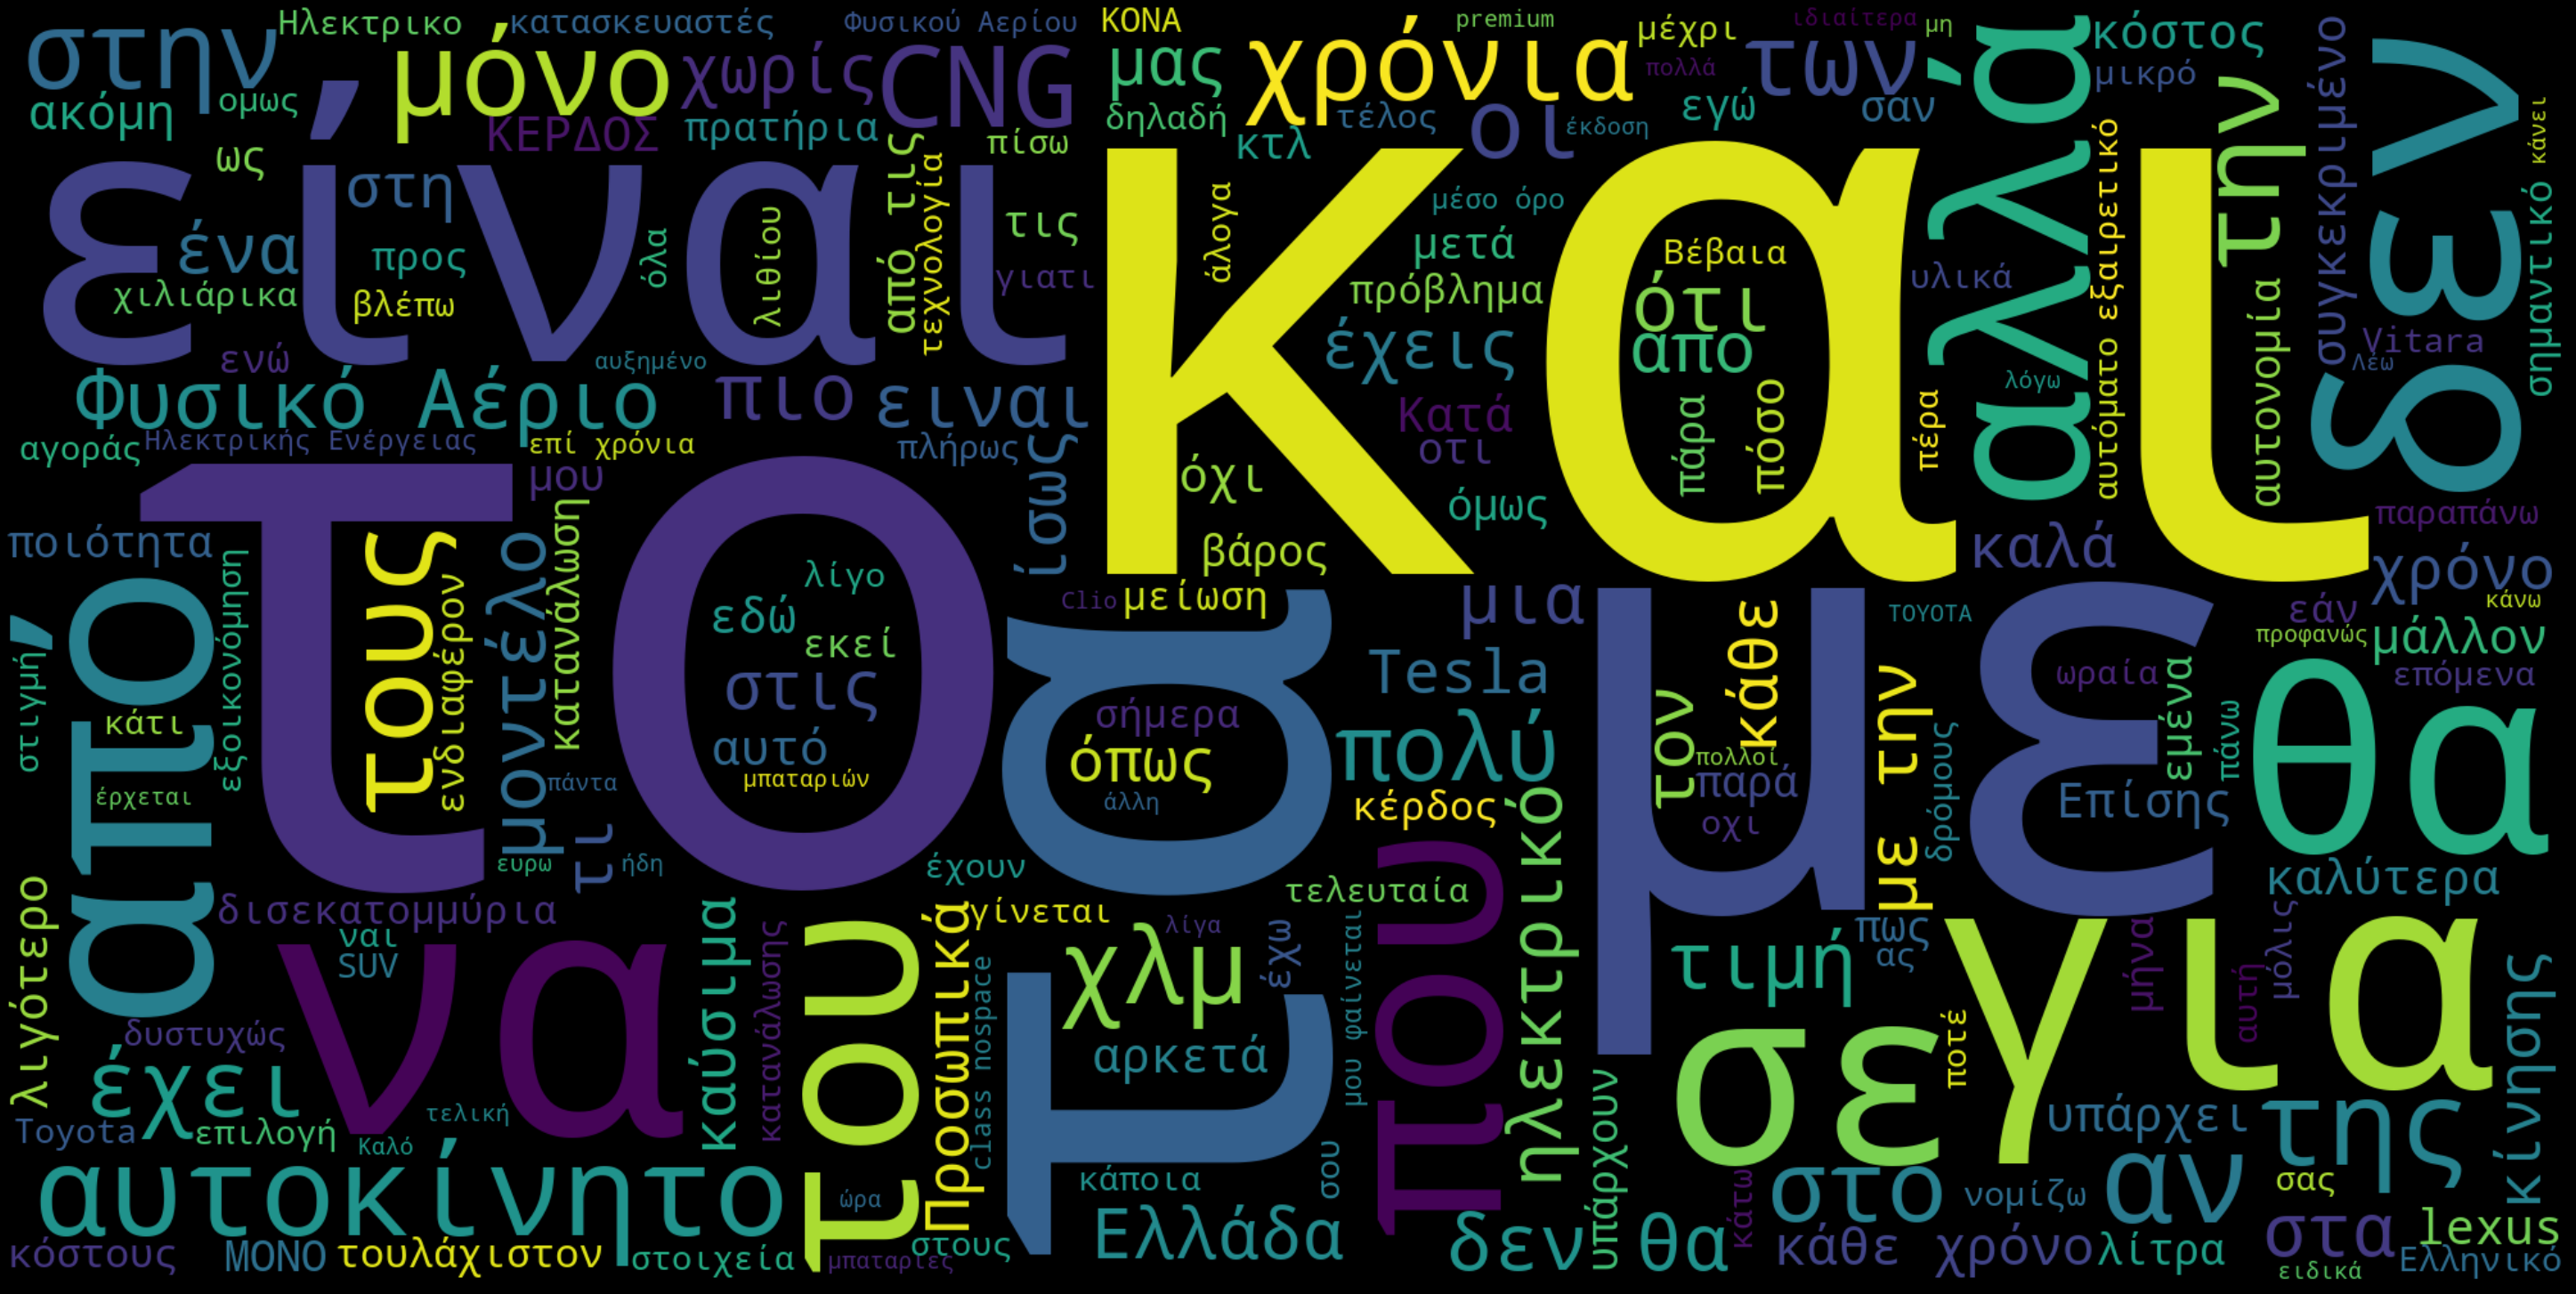

In [25]:
wordcloud = WordCloud(
#   stopwords = STOPWORDS,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(CommentsText)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [26]:
import spacy

In [27]:
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [28]:
nlp = spacy.load('el_core_news_sm')

In [29]:
list(nlp.Defaults.stop_words)[0:20]

['έξω',
 'πίσω',
 'πολλές',
 'πλάι',
 'με',
 'ιδία',
 'αμέσως',
 'μονομιάς',
 'τελευταίος',
 'συχνός',
 'έξαφνα',
 'καθετί',
 'εκείνα',
 'είχατε',
 'εκάστου',
 'εμάς',
 'μετ',
 'ταύτων',
 'συχνών',
 'ταύτη']

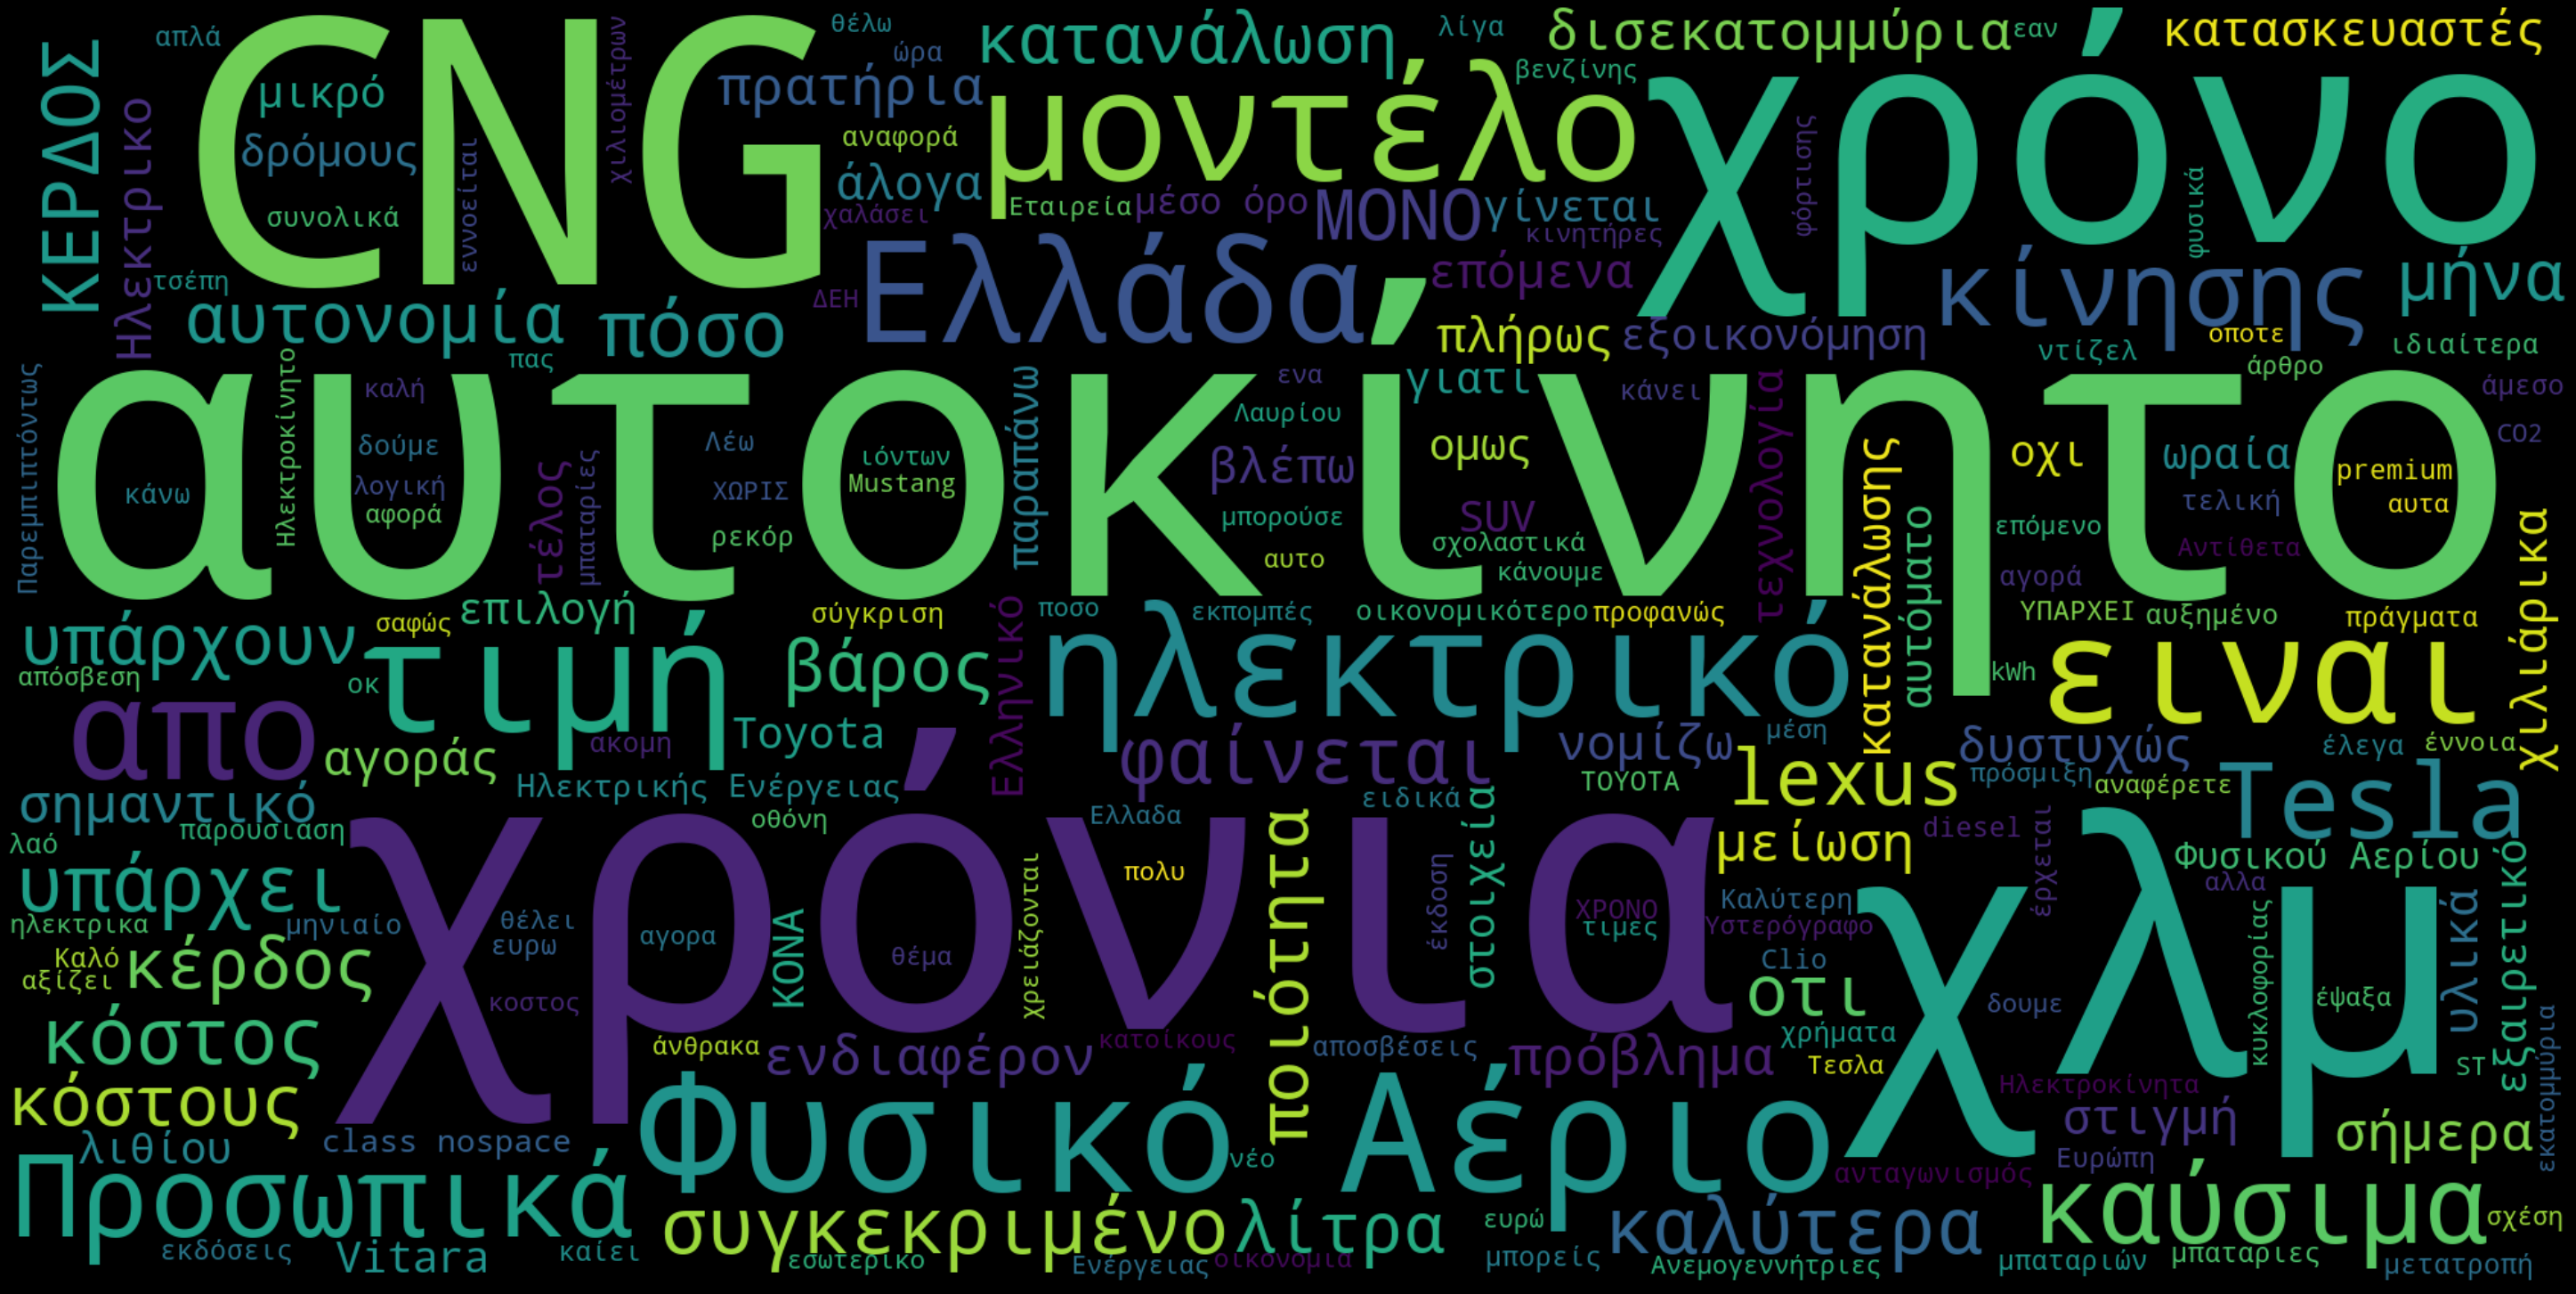

In [30]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'black'
 ).generate(CommentsText)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Ας βρούμε για καθε λέξη που βρίσκεται σε διαφορετικές πτώσεις στην ονομαστική, και τα ρήματα στο 1ο πρόσωπο... Lemmatization

In [31]:
doc = nlp(dfAutotriti['Coomments'][0])

In [32]:
for token in doc:
    print(token, token.lemma_)

Θεωρώ θεωρώ
ότι ότι
τα τα
επόμενα επόμενος
( (
λίγα λίγος
) )
χρόνια χρόνια
η η
εξέλιξη εξέλιξη
των των
ηλεκτρικό ηλεκτρικό
θα θα
είναι είναι
αντίστοιχη αντίστοιχη
αυτή αυτή
των των
« «
σμαρτφόν σμαρτφόν
» »
. .
Βέβαια βέβαια
, ,
στο στο
αυτοκίνητο αυτοκίνητο
εμπλέκονται εμπλέκομαι
ιδιαίτερα ιδιαίτερα
κ κ
οι οι
νόμοι νόμοι
της της
φυσικής φυσικός
, ,
μηχανικής μηχανικός
, ,
κ κ
πολλοί πολλός
, ,
πολλοί πολλός
, ,
άλλοι άλλοι
. .

 

Το το
συγκεκριμένο συγκεκριμένος
μοντέλο μοντέλο
δείχνει δείχνω
νεανικό νεανικό
, ,
κ κ
προφανώς προφανώς
είναι είναι
ανταγωνιστικό ανταγωνιστικό
σε σε
μια μια
κατηγορία κατηγορίο
που που
προσωπικά προσωπικά
δεν δεν
μπορώ μπορώ
ακόμα ακόμα
να να
εμπιστευτώ εμπιστευτώ
( (
ιδίως ιδίως
σε σε
μια μια
χώρα χώρα
σαν σαν
την την
Ελλάδα Ελλάδα
) )
, ,
κ κ
μάλλον μάλλον
δεν δεν
στοχεύει στοχεύω
εμένα εμένα
. .

 

Ας ας
μη μη
σταθώ σταθάω
στη στη
ΠΡΑΓΜΑΤΙΚΗ πραγματικη
αυτονομία αυτονομία
που που
είναι είναι
η η
πιο πιο
γνωστή γνωστός
αχίλλειος αχίλλειος
πτέρνα πτέρν

In [33]:
' '.join(token.lemma_ for token in doc)

'θεωρώ ότι τα επόμενος ( λίγος ) χρόνια η εξέλιξη των ηλεκτρικό θα είναι αντίστοιχη αυτή των « σμαρτφόν » . βέβαια , στο αυτοκίνητο εμπλέκομαι ιδιαίτερα κ οι νόμοι της φυσικός , μηχανικός , κ πολλός , πολλός , άλλοι . \n το συγκεκριμένος μοντέλο δείχνω νεανικό , κ προφανώς είναι ανταγωνιστικό σε μια κατηγορίο που προσωπικά δεν μπορώ ακόμα να εμπιστευτώ ( ιδίως σε μια χώρα σαν την Ελλάδα ) , κ μάλλον δεν στοχεύω εμένα . \n ας μη σταθάω στη πραγματικη αυτονομία που είναι η πιο γνωστός αχίλλειος πτέρνο ( clima , 3 άτομο , 130-140χλμ / ώρος εθνικός ) , αλλά , σε μικρομεσαίος όχημα με βάρος 2,2 τόνο : \n α ) πόσο αντέχω στις κακοτεχνίε των δρόμα σε βάθος 5ετια , β ) ποιότηα συναρμογή κ υλικός καθότι διέπομαι από άλλη κατασκευαστικός φιλοσοφία κ απευθύνομαι σε καταναλωτής με μάλλον ( ίσως να κάνω λαθο ) λιγότερες απαιτήσει ( ? ) . γ ) απόσταση ακινητοποίηση 100-0 μετά από έντονη χρήση , ε ) καμία αναφορά πως συμπεριφέρομαι αυτά τα οχήματο ή κ το συγκεκριμένος στα crash tests ? \n  καμία αναφ

In [34]:
CommentsText

'Θεωρώ ότι τα επόμενα (λίγα) χρόνια η εξέλιξη των ηλεκτρικό θα είναι αντίστοιχη αυτή των «σμαρτφόν». Βέβαια, στο αυτοκίνητο εμπλέκονται ιδιαίτερα κ οι νόμοι της φυσικής, μηχανικής, κ πολλοί, πολλοί, άλλοι. \nΤο συγκεκριμένο μοντέλο δείχνει νεανικό, κ προφανώς είναι ανταγωνιστικό σε μια κατηγορία που προσωπικά δεν μπορώ ακόμα να εμπιστευτώ (ιδίως σε μια χώρα σαν την Ελλάδα), κ μάλλον δεν στοχεύει εμένα. \nΑς μη σταθώ στη ΠΡΑΓΜΑΤΙΚΗ αυτονομία που είναι η πιο γνωστή αχίλλειος πτέρνα (clima, 3 άτομα, 130-140χλμ/ώρα εθνική), αλλά, σε μικρομεσαίο όχημα με βάρος 2,2 τόνων: \nα) Πόσο αντέχει στις κακοτεχνίες των δρόμων σε βάθος 5ετιας, β) ποιότητα συναρμογής κ υλικών καθότι διέπονται από άλλη κατασκευαστική φιλοσοφία κ απευθύνονται σε καταναλωτές με μάλλον (ίσως να κάνω λαθος) λιγότερες απαιτήσεις (?). γ) απόσταση ακινητοποίησης 100-0 μετά από έντονη χρήση, ε) καμία αναφορά πως συμπεριφέρονται αυτά τα οχήματα ή κ το συγκεκριμένο στα crash tests?\n Καμία αναφορά από τους κατασκευαστές για αστέρ

In [35]:
full_doc = nlp(CommentsText)

In [36]:
full_doc

Θεωρώ ότι τα επόμενα (λίγα) χρόνια η εξέλιξη των ηλεκτρικό θα είναι αντίστοιχη αυτή των «σμαρτφόν». Βέβαια, στο αυτοκίνητο εμπλέκονται ιδιαίτερα κ οι νόμοι της φυσικής, μηχανικής, κ πολλοί, πολλοί, άλλοι. 
Το συγκεκριμένο μοντέλο δείχνει νεανικό, κ προφανώς είναι ανταγωνιστικό σε μια κατηγορία που προσωπικά δεν μπορώ ακόμα να εμπιστευτώ (ιδίως σε μια χώρα σαν την Ελλάδα), κ μάλλον δεν στοχεύει εμένα. 
Ας μη σταθώ στη ΠΡΑΓΜΑΤΙΚΗ αυτονομία που είναι η πιο γνωστή αχίλλειος πτέρνα (clima, 3 άτομα, 130-140χλμ/ώρα εθνική), αλλά, σε μικρομεσαίο όχημα με βάρος 2,2 τόνων: 
α) Πόσο αντέχει στις κακοτεχνίες των δρόμων σε βάθος 5ετιας, β) ποιότητα συναρμογής κ υλικών καθότι διέπονται από άλλη κατασκευαστική φιλοσοφία κ απευθύνονται σε καταναλωτές με μάλλον (ίσως να κάνω λαθος) λιγότερες απαιτήσεις (?). γ) απόσταση ακινητοποίησης 100-0 μετά από έντονη χρήση, ε) καμία αναφορά πως συμπεριφέρονται αυτά τα οχήματα ή κ το συγκεκριμένο στα crash tests?
 Καμία αναφορά από τους κατασκευαστές για αστέρια, κ

Vectorization

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [38]:
print(np.isnan(dfAutotriti['Coomments']).any(axis=2))

TypeError: ignored

In [39]:
dfAutotriti['Coomments'].dropna()

0      Θεωρώ ότι τα επόμενα (λίγα) χρόνια η εξέλιξη τ...
3          Να μια καλη ειδηση! Ηλεκτρικο απο 11000 ευρω!
8      Καλό αλλά 25 χιλιάρικα τελική τιμή στην πλουσι...
10     Πιο σουλουπωμένο από τις (απαράδεκτες) προηγού...
16     Οι πολλαπλοί συνεσμοι στη πίσω αναρτηση υπάρχο...
18     Κύριοι του ειδικού τύπου το ξέρετε καλύτερα απ...
45     Δεν ξερω αν καίει λιγότερο από το πόλο, αλλά α...
53     Όλα (πολύ) καλά κ ωραία κ με το συγκεκριμένο μ...
58     Αναρωτιέμαι σε τι εξυπηρετεί πρακτικά ένα ρεκό...
63     Όταν δηλαδή τα ηλεκτρικό γίνουν προσιτά κι ακο...
66     Απευθυνεται σε λατρεις τω κλασσικων Mini, γιατ...
68     Με υπερπλήρη εξοπλισμό και 8 χρόνια εγγύηση εί...
69     Εξωτερικά είναι μάλλον πιο ενδιαφέρον από το Κ...
72     19. 000χιλ. (6.500.000 εκατομμύρια δρχ) για 1....
77     Οπως και να΄ναι το Model S ειναι πανω απο 10 χ...
79     Η ανακατευθυνση της αυτοκινησης σε εξηλεκτρισμ...
80     Και τέλος ο μήνας του μέλιτος για την Tesla......
91     Ειναι η απαντηση της Toy

In [40]:
dfAutotriti.dropna(subset=['Coomments'], inplace=True)

In [41]:
dfAutotriti

headline  ...       date
0    ΟΔΗΓΟΥΜΕ ΤΟ ΗΛΕΚΤΡΙΚΟΟδηγούμε το νέο Hyundai I...  ...   2/7/2021
3                To 2021 στην αγορά το ηλεκτρικό Dacia  ...  17/2/2020
8    ΥΒΡΙΔΙΚΟ ΜΕ 140 PS, «ΚΑΙΕΙ» 5,3 ΛΤ.Δοκιμή: Υβρ...  ...  13/6/2021
10   ΜΕ 240 ΑΛΟΓΑ & ΚΑΤΑΝΑΛΩΣΗ 6 ΛΤ.Δοκιμή: Jeep Co...  ...  30/6/2021
16   MILD HYBRID 1,0 ΛΤ. ΜΕ 120 PSΔοκιμή: Ήπια υβρι...  ...   4/7/2021
18   Βενζινοκίνητα μικρά που καίνε σαν… dieselΤα 5 ...  ...  10/6/2021
45   ΜΕ 245 ΑΛΟΓΑ - «Καίει» λιγότερο από PoloΔοκιμή...  ...  21/6/2021
53   Στην Ελλάδα το DS 7 Crossback E-Tense με τα 22...  ...  14/6/2021
58       Renault Zoe: Νέο ρεκόρ αυτονομίας με 765 χλμ.  ...  14/6/2021
63        «Βόμβα» από ΔΝΤ για τεκμήρια στα ηλεκτρικά    ...  11/6/2021
66   Mετατρέπουν κλασικά ΜΙΝΙ σε ηλεκτρικά αντί 29....  ...  10/6/2021
68   MILD HYBRID 1,0 ΛΤ. ΜΕ 155 PSΔοκιμή: Ford Fies...  ...   9/6/2021
69         Οι τιμές του νέου Hyundai Bayon στην Ελλάδα  ...   9/6/2021
72   ΑΥΤΟΜΑΤΟ & ΗΠΙΑ ΥΒΡΙΔΙΚΟ ΜΕ 120 PSΔοκιμή: Kia ...  ...   8/6/2021
77                    Η Tesla έκοψε το Model S Plaid +  ...   7/6/2021
79    Νέα κορυφαία έκδοση για το Skoda Enyaq με 265 PS  ...   7/6/2021
80   ΕΝΤΥΠΩΣΙΑΚΗ ΡΟΠΗ & ΑΥΤΟΝΟΜΙΑΟδηγούμε: Νέα Must...  ...   5/6/2021
91   Το πρώτο αμιγώς ηλεκτρικό ToyotaTα «περίεργα» ...  ...   4/6/2021
98   GADGET CAR ΜΕ 450 PSΔοκιμή: Νέο Τesla Model 3 ...  ...   3/6/2021
99        Με οθόνη 27 ιντσών το νέο ηλεκτρικό της Ford  ...   3/6/2021
102  Έρχονται μπαταρίες που φορτίζουν μέσα σε 10 λεπτά  ...   3/6/2021
109         Πιο προσιτά από ποτέ τα νέα VW ID.3 & ID.4  ...   2/6/2021
114  ΠΡΩΤΗ ΕΠΑΦΗΑπό την Κίνα με αγάπη: το ηλεκτρικό...  ...   1/6/2021
115                    Νέο Rimac Nevera με 1.914 άλογα  ...   1/6/2021
120               Το ηλεκτρικό Renault 4 παίρνει μορφή  ...  31/5/2021
125  ΜΕ 218 PS & ΧΩΡΙΣ ΝΑ «ΚΑΙΕΙ»Δοκιμή: Mercedes G...  ...  30/5/2021

[26 rows x 6 columns]

In [42]:
count_vector = cv.fit_transform(dfAutotriti['Coomments'])

In [43]:
count_vector.shape

(26, 1365)

In [44]:
# cv.get_feature_names()

results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head()

000  000χιλ  01700  10  100  1000άσει  ...  ότι  όφελος  όχημα  όχι  ώρα  ώρες
0    0       0      0   0    1         0  ...    1       0      1    0    1     0
1    0       0      0   0    0         0  ...    0       0      0    0    0     0
2    0       0      0   0    0         0  ...    0       0      0    1    0     0
3    0       0      0   0    0         0  ...    0       0      0    0    0     0
4    0       0      0   0    0         0  ...    0       0      0    0    0     0

[5 rows x 1365 columns]

In [45]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [46]:
count_vector = cv.fit_transform(dfAutotriti)

In [47]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head(20)

coomments  date  datethings  headline  lead  url
0          0     0           0         1     0    0
1          0     0           0         0     0    1
2          0     0           0         0     1    0
3          0     0           1         0     0    0
4          1     0           0         0     0    0
5          0     1           0         0     0    0

In [48]:
from html import unescape
def my_tokenizer(doc):
            
    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(doc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [49]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(dfAutotriti['Coomments'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκαστας', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικας', 'αλλοιώτικας', 'αφότο', 'βεβαιότατας', 'γρήγορας', 'δίχω', 'εαυτός', 'εκάστα', 'εκάστο', 'ετούτε', 'ευθύ', 'εχτής', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνε', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποιής', 'ποιώ', 'πολλός', 'προχθής', 'προχτή', 'πόσε', 'πόσο', 'σει', 'στος', 'συχνά', 'συχνέ', 'ταύ', 'ταύτε', 'ταύτο', 'τούτε', 'όποι'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


\n\n\n  'ασύγχρονο'  'γήινη'  'γιαπωνέζικα'  ...  όχημα  ώρα  ώρες  ώρος
0       0            0        0              0  ...      1    0     0     1
1       0            0        0              0  ...      0    0     0     0
2       0            0        0              1  ...      0    0     0     0
3       0            0        0              0  ...      0    0     0     0
4       0            0        0              0  ...      0    0     0     0

[5 rows x 1134 columns]

In [50]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20) #, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(dfAutotriti['Coomments'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

000  100  cng  tesla  αέριο  απο  ...  τιμή  υπάρχει  φυσικό  χλμ  χρόνια  χρόνο
0    0    1    0      0      0    0  ...     0        0       0    0       1      0
1    0    0    0      0      0    1  ...     0        0       0    0       0      0
2    0    0    0      0      0    1  ...     1        0       0    0       1      0
3    0    0    0      0      0    1  ...     0        0       0    0       0      0
4    0    0    0      0      0    0  ...     0        1       0    0       0      0

[5 rows x 20 columns]

In [51]:
results.sum(axis =0).sort_values(ascending = False)

000           22
αυτοκίνητο    20
χρόνια        18
cng           16
χλμ           14
χρόνο         12
φυσικό        12
αέριο         11
μοντέλο       10
τιμή          10
ειναι          9
100            9
ηλεκτρικό      9
ελλάδα         8
απο            8
προσωπικά      6
καύσιμα        6
κίνησης        6
tesla          6
υπάρχει        5
dtype: int64

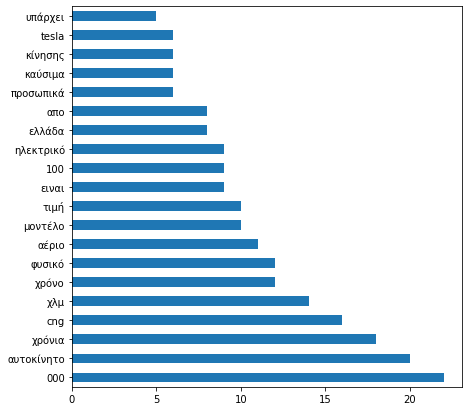

In [52]:
results.sum(axis =0).sort_values(ascending = False).head(20).plot(kind = 'barh', figsize=(7,7))

In [53]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bηλ[α-ω-ά-ω]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfAutotriti['Coomments'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

ηλεκτρικά  ηλεκτρικής  ηλεκτρικα  ...  ηλεκτρονικά  ηλιθιο  ηλικίας
0          0           0          0  ...            0       0        0
1          0           0          0  ...            0       0        0
2          0           0          0  ...            0       0        0
3          0           0          0  ...            0       0        0
4          0           0          0  ...            0       0        0

[5 rows x 10 columns]

In [54]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bμπα[α-ω-ά-ω]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfAutotriti['Coomments'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

μπαταρίες  μπαταριες  μπαταριων
0          0          1          0
1          0          0          0
2          0          0          0
3          0          1          0
4          0          0          0

In [57]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bαυτ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfAutotriti['Coomments'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

000 χλμ  100 χλμ  20 000  ...  χιλιάρικα τελική  χιλιομέτρων χρόνο  χλμ έτος
0        0        0       0  ...                 0                  0         0
1        0        0       0  ...                 0                  0         0
2        0        0       0  ...                 1                  0         0
3        0        0       0  ...                 0                  0         0
4        0        0       0  ...                 0                  0         0

[5 rows x 20 columns]

In [58]:
results.sum(axis =0).sort_values(ascending = False)

φυσικό αέριο            11
100 χλμ                  6
000 χλμ                  4
αέριο cng                4
class nospace            3
φυσικού αερίου           3
συγκεκριμένο μοντέλο     3
πρατήρια cng             3
μέσο όρο                 3
λίτρα 100                3
20 000                   3
500 000                  3
ηλεκτρικής ενέργειας     3
δισεκατομμύρια χρόνο     3
αυτοκίνητο cng           3
χλμ έτος                 2
χιλιομέτρων χρόνο        2
κόστος 100               2
χιλιάρικα τελική         2
ιόντων λιθίου            2
dtype: int64

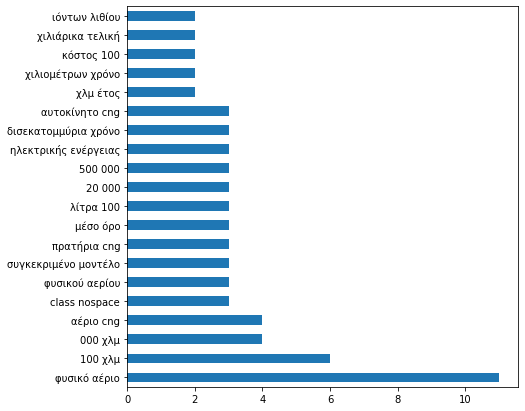

In [59]:
results.sum(axis =0).sort_values(ascending = False).head(20).plot(kind = 'barh', figsize=(7,7))

In [68]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
 #                    token_pattern = '(\\bκ[οω]ρ[οω]ν[α-ωά-ώ]+\\b') )\| (\\bκυβ[α-ωά-ώ]\\b) #, tokenizer=my_tokenizer)
                     token_pattern = '\\bαυτ[α-ω-ά-ω]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfAutotriti['Coomments'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

αυτα  αυτες  αυτο  ...  αυτοκινητα  αυτοκινητο  αυτονομία
0     0      0     0  ...           0           0          1
1     0      0     0  ...           0           0          0
2     0      0     0  ...           0           0          0
3     0      0     0  ...           0           0          0
4     0      0     0  ...           0           0          0

[5 rows x 9 columns]

In [69]:
results.sum(axis =0).sort_values(ascending = False)

αυτοκίνητο     20
αυτονομία       4
αυτο            2
αυτα            2
αυτοκινητο      1
αυτοκινητα      1
αυτοκινησης     1
αυτοκίνηση      1
αυτες           1
dtype: int64

11. Αξιοποιήστε την διανυσματοποίηση των κειμένων σας (CountVectorizer()), και τη χρήση της ομοιότητας κειμένων μέσω της συνάρτησης cosine_similarity() ώστε να βρείτε άρθρα που έχουν μεγάλη ομοιότητα. Παρουσιάστε τη συσχέτιση αυτή μέσω γραφήματος τύπου heatmap.

In [71]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, #ngram_range=(1, 2), 
                     vocabulary = ['αυτονομία', 'μπαταρία', 'ηλεκτρικό', 'ηλεκτροκινητήρας', 'tesla', 'ηλεκτροκίνηση', 'υβριδικό', 'υδρογόνο', 'κινητήρας', 'καύσης', 'ΔΕΗ', 'φόρτιση', 'αέριο', 'CNG']) #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfAutotriti['Coomments'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head(20)

αυτονομία  μπαταρία  ηλεκτρικό  ηλεκτροκινητήρας  ...  ΔΕΗ  φόρτιση  αέριο  CNG
0           1         0          1                 0  ...    0        0      0    0
1           0         0          0                 0  ...    0        0      0    0
2           0         0          0                 0  ...    0        0      0    0
3           0         0          0                 0  ...    0        0      0    0
4           0         0          0                 0  ...    0        0      0    0
5           0         0          0                 0  ...    0        0      0    0
6           0         0          0                 0  ...    0        0      0    0
7           0         0          1                 0  ...    0        0      0    0
8           0         0          2                 0  ...    0        0     11    0
9           0         0          2                 0  ...    0        0      0    0
10          0         0          1                 0  ...    0        0      0    0
11          0         0          0                 0  ...    0        0      0    0
12          0         0          0                 0  ...    0        0      0    0
13          0         0          0                 0  ...    0        0      0    0
14          0         0          0                 0  ...    0        0      0    0
15          2         0          1                 0  ...    0        0      0    0
16          0         0          0                 0  ...    0        0      0    0
17          0         0          0                 0  ...    0        0      0    0
18          1         0          1                 0  ...    0        1      0    0
19          0         0          0                 0  ...    0        0      0    0

[20 rows x 14 columns]

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [73]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(dfAutotriti['Coomments'])  #finds the tfidf score with normalization

In [74]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

000   10       100   15  150  ...  χρόνο  χωρις  ωραία  όρο       ώρα
0  0.0  0.0  0.124239  0.0  0.0  ...    0.0    0.0    0.0  0.0  0.136523
1  0.0  0.0  0.000000  0.0  0.0  ...    0.0    0.0    0.0  0.0  0.000000
2  0.0  0.0  0.000000  0.0  0.0  ...    0.0    0.0    0.0  0.0  0.000000
3  0.0  0.0  0.000000  0.0  0.0  ...    0.0    0.0    0.0  0.0  0.000000
4  0.0  0.0  0.000000  0.0  0.0  ...    0.0    0.0    0.0  0.0  0.000000

[5 rows x 500 columns]

In [75]:
from sklearn.metrics.pairwise import cosine_similarity
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

cosine scores ==>  [[1.         0.         0.12189172 0.08848089 0.         0.05284281
  0.04833095 0.18153861 0.07426147 0.03449851 0.02592033 0.01305889
  0.01831208 0.         0.         0.04383726 0.03285907 0.01992028
  0.08760523 0.         0.07470851 0.         0.09255572 0.
  0.         0.        ]]


In [76]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)) 

cosine scores ==>  [[1.         0.         0.12189172 0.08848089 0.         0.05284281
  0.04833095 0.18153861 0.07426147 0.03449851 0.02592033 0.01305889
  0.01831208 0.         0.         0.04383726 0.03285907 0.01992028
  0.08760523 0.         0.07470851 0.         0.09255572 0.
  0.         0.        ]
 [0.         1.         0.04024694 0.07444656 0.         0.
  0.         0.         0.00704537 0.         0.         0.
  0.         0.         0.0758722  0.03743192 0.21894085 0.
  0.04454059 0.         0.         0.         0.         0.
  0.         0.        ]
 [0.12189172 0.04024694 1.         0.07430165 0.         0.11173501
  0.06603148 0.0688834  0.03847722 0.         0.         0.10047174
  0.02409098 0.         0.01576222 0.02395823 0.01658612 0.03137627
  0.07461659 0.03424196 0.05877714 0.         0.0658578  0.
  0.         0.        ]
 [0.08848089 0.07444656 0.07430165 1.         0.         0.
  0.         0.07504354 0.02136969 0.05312416 0.07982928 0.04485988
  0.062249

In [77]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

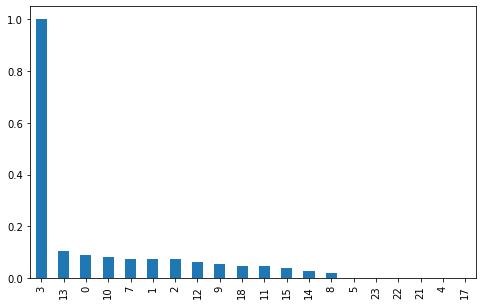

In [78]:
pd.DataFrame(arr).loc[3].sort_values(ascending = False).head(20).plot(kind = 'bar', figsize = [8,5])

6. Να πραγματοποιήσετε αναλύσεις στα αριθμητικά δεδομένα σας και να δημιουργήσετε τα αντίστοιχα γραφήματα, τα οποία δείχνουν χαρακτηριστικά και συσχετίσεις που κρύβουν τα δεδομένα σας.

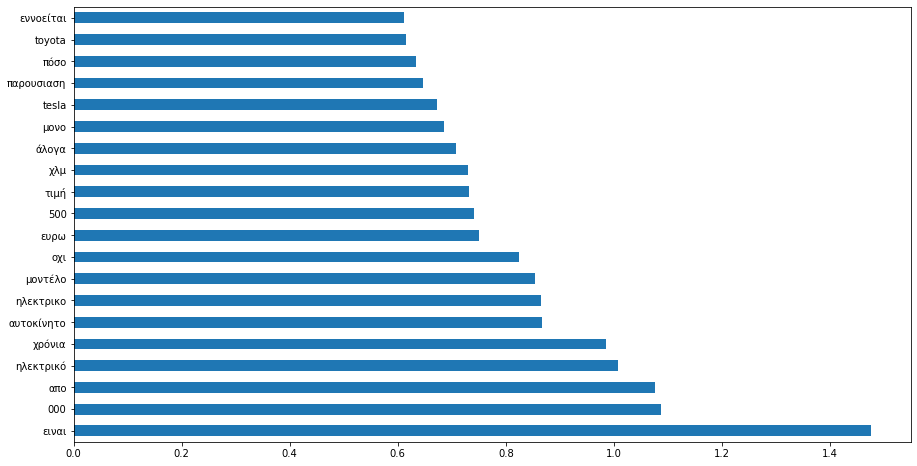

In [79]:
results.sum(axis =0).sort_values(ascending = False).head(20).plot(kind="barh", figsize=(15, 8)) 

In [81]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfAutotriti['Coomments'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

κυβικά  κυκλοφορήσουν  κυκλοφορίας  κυκλοφορούν
0       0              0            0            0
1       0              0            0            0
2       0              0            0            0
3       0              0            0            0
4       0              0            0            0

In [82]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) ) #token_pattern = '\\bκυ[α-ωά-ώ]*\\b') #, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfAutotriti['Coomments'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

000 χλμ  100 χλμ  20 000  ...  χιλιάρικα τελική  χιλιομέτρων χρόνο  χλμ έτος
0        0        0       0  ...                 0                  0         0
1        0        0       0  ...                 0                  0         0
2        0        0       0  ...                 1                  0         0
3        0        0       0  ...                 0                  0         0
4        0        0       0  ...                 0                  0         0

[5 rows x 20 columns]

In [83]:
results.sum(axis =0).sort_values(ascending = False)

φυσικό αέριο            11
100 χλμ                  6
000 χλμ                  4
αέριο cng                4
class nospace            3
φυσικού αερίου           3
συγκεκριμένο μοντέλο     3
πρατήρια cng             3
μέσο όρο                 3
λίτρα 100                3
20 000                   3
500 000                  3
ηλεκτρικής ενέργειας     3
δισεκατομμύρια χρόνο     3
αυτοκίνητο cng           3
χλμ έτος                 2
χιλιομέτρων χρόνο        2
κόστος 100               2
χιλιάρικα τελική         2
ιόντων λιθίου            2
dtype: int64

Διάγραμμα με τις 20 συχνότερες φράσεις

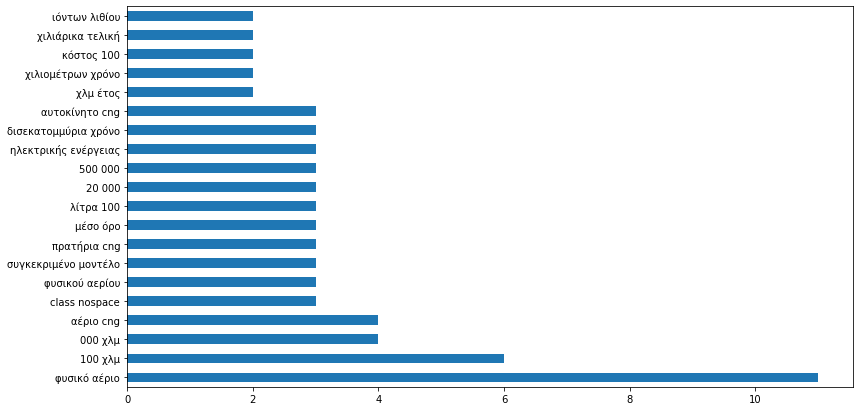

In [84]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(20).plot(kind="barh", figsize=(13, 7)) 

#9	Κάνοντας χρήση του ελληνικού λεξικού για sentiment anaysis του NRC βρείτε την πολικότητα (θετική - αρνητική) και τα συναισθήματα των κειμένων σας, και αποθηκεύστε τα σε νέες στήλες στο dataframe των δεδομένων σας.

In [85]:
import spacy
!python -m spacy download el_core_news_sm

✔ Download and installation successful
You can now load the model via spacy.load('el_core_news_sm')


In [86]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [87]:
CommentsText = dfAutotriti['Coomments'].str.cat(sep = ' ').replace("amp", '')

In [88]:
CommentsText

'Θεωρώ ότι τα επόμενα (λίγα) χρόνια η εξέλιξη των ηλεκτρικό θα είναι αντίστοιχη αυτή των «σμαρτφόν». Βέβαια, στο αυτοκίνητο εμπλέκονται ιδιαίτερα κ οι νόμοι της φυσικής, μηχανικής, κ πολλοί, πολλοί, άλλοι. \nΤο συγκεκριμένο μοντέλο δείχνει νεανικό, κ προφανώς είναι ανταγωνιστικό σε μια κατηγορία που προσωπικά δεν μπορώ ακόμα να εμπιστευτώ (ιδίως σε μια χώρα σαν την Ελλάδα), κ μάλλον δεν στοχεύει εμένα. \nΑς μη σταθώ στη ΠΡΑΓΜΑΤΙΚΗ αυτονομία που είναι η πιο γνωστή αχίλλειος πτέρνα (clima, 3 άτομα, 130-140χλμ/ώρα εθνική), αλλά, σε μικρομεσαίο όχημα με βάρος 2,2 τόνων: \nα) Πόσο αντέχει στις κακοτεχνίες των δρόμων σε βάθος 5ετιας, β) ποιότητα συναρμογής κ υλικών καθότι διέπονται από άλλη κατασκευαστική φιλοσοφία κ απευθύνονται σε καταναλωτές με μάλλον (ίσως να κάνω λαθος) λιγότερες απαιτήσεις (?). γ) απόσταση ακινητοποίησης 100-0 μετά από έντονη χρήση, ε) καμία αναφορά πως συμπεριφέρονται αυτά τα οχήματα ή κ το συγκεκριμένο στα crash tests?\n Καμία αναφορά από τους κατασκευαστές για αστέρ

In [89]:
nlp = spacy.load('el_core_news_sm')

In [90]:
list(nlp.Defaults.stop_words)[0:10]

['συχνού',
 'πέρι',
 'λοιπά',
 'εκείνης',
 'βέβαια',
 'άξαφνα',
 'παντού',
 'κακά',
 'εσένα',
 'ορισμένων']

In [91]:
Commentsdoc = nlp(dfAutotriti['Coomments'][0])

In [92]:
Commentsdoc

Θεωρώ ότι τα επόμενα (λίγα) χρόνια η εξέλιξη των ηλεκτρικό θα είναι αντίστοιχη αυτή των «σμαρτφόν». Βέβαια, στο αυτοκίνητο εμπλέκονται ιδιαίτερα κ οι νόμοι της φυσικής, μηχανικής, κ πολλοί, πολλοί, άλλοι. 
Το συγκεκριμένο μοντέλο δείχνει νεανικό, κ προφανώς είναι ανταγωνιστικό σε μια κατηγορία που προσωπικά δεν μπορώ ακόμα να εμπιστευτώ (ιδίως σε μια χώρα σαν την Ελλάδα), κ μάλλον δεν στοχεύει εμένα. 
Ας μη σταθώ στη ΠΡΑΓΜΑΤΙΚΗ αυτονομία που είναι η πιο γνωστή αχίλλειος πτέρνα (clima, 3 άτομα, 130-140χλμ/ώρα εθνική), αλλά, σε μικρομεσαίο όχημα με βάρος 2,2 τόνων: 
α) Πόσο αντέχει στις κακοτεχνίες των δρόμων σε βάθος 5ετιας, β) ποιότητα συναρμογής κ υλικών καθότι διέπονται από άλλη κατασκευαστική φιλοσοφία κ απευθύνονται σε καταναλωτές με μάλλον (ίσως να κάνω λαθος) λιγότερες απαιτήσεις (?). γ) απόσταση ακινητοποίησης 100-0 μετά από έντονη χρήση, ε) καμία αναφορά πως συμπεριφέρονται αυτά τα οχήματα ή κ το συγκεκριμένο στα crash tests?
 Καμία αναφορά από τους κατασκευαστές για αστέρια, κ

In [93]:
for token in Commentsdoc:
    print(token, token.lemma_)

Θεωρώ θεωρώ
ότι ότι
τα τα
επόμενα επόμενος
( (
λίγα λίγος
) )
χρόνια χρόνια
η η
εξέλιξη εξέλιξη
των των
ηλεκτρικό ηλεκτρικό
θα θα
είναι είναι
αντίστοιχη αντίστοιχη
αυτή αυτή
των των
« «
σμαρτφόν σμαρτφόν
» »
. .
Βέβαια βέβαια
, ,
στο στο
αυτοκίνητο αυτοκίνητο
εμπλέκονται εμπλέκομαι
ιδιαίτερα ιδιαίτερα
κ κ
οι οι
νόμοι νόμοι
της της
φυσικής φυσικός
, ,
μηχανικής μηχανικός
, ,
κ κ
πολλοί πολλός
, ,
πολλοί πολλός
, ,
άλλοι άλλοι
. .

 

Το το
συγκεκριμένο συγκεκριμένος
μοντέλο μοντέλο
δείχνει δείχνω
νεανικό νεανικό
, ,
κ κ
προφανώς προφανώς
είναι είναι
ανταγωνιστικό ανταγωνιστικό
σε σε
μια μια
κατηγορία κατηγορίας
που που
προσωπικά προσωπικά
δεν δεν
μπορώ μπορώ
ακόμα ακόμα
να να
εμπιστευτώ εμπιστευτώ
( (
ιδίως ιδίως
σε σε
μια μια
χώρα χώρα
σαν σαν
την την
Ελλάδα Ελλάδα
) )
, ,
κ κ
μάλλον μάλλον
δεν δεν
στοχεύει στοχεύω
εμένα εμένα
. .

 

Ας ας
μη μη
σταθώ σταθάω
στη στη
ΠΡΑΓΜΑΤΙΚΗ πραγματικη
αυτονομία αυτονομία
που που
είναι είναι
η η
πιο πιο
γνωστή γνωστός
αχίλλειος αχίλλειος
πτέρνα πτέρ

In [94]:
CommentsText

'Θεωρώ ότι τα επόμενα (λίγα) χρόνια η εξέλιξη των ηλεκτρικό θα είναι αντίστοιχη αυτή των «σμαρτφόν». Βέβαια, στο αυτοκίνητο εμπλέκονται ιδιαίτερα κ οι νόμοι της φυσικής, μηχανικής, κ πολλοί, πολλοί, άλλοι. \nΤο συγκεκριμένο μοντέλο δείχνει νεανικό, κ προφανώς είναι ανταγωνιστικό σε μια κατηγορία που προσωπικά δεν μπορώ ακόμα να εμπιστευτώ (ιδίως σε μια χώρα σαν την Ελλάδα), κ μάλλον δεν στοχεύει εμένα. \nΑς μη σταθώ στη ΠΡΑΓΜΑΤΙΚΗ αυτονομία που είναι η πιο γνωστή αχίλλειος πτέρνα (clima, 3 άτομα, 130-140χλμ/ώρα εθνική), αλλά, σε μικρομεσαίο όχημα με βάρος 2,2 τόνων: \nα) Πόσο αντέχει στις κακοτεχνίες των δρόμων σε βάθος 5ετιας, β) ποιότητα συναρμογής κ υλικών καθότι διέπονται από άλλη κατασκευαστική φιλοσοφία κ απευθύνονται σε καταναλωτές με μάλλον (ίσως να κάνω λαθος) λιγότερες απαιτήσεις (?). γ) απόσταση ακινητοποίησης 100-0 μετά από έντονη χρήση, ε) καμία αναφορά πως συμπεριφέρονται αυτά τα οχήματα ή κ το συγκεκριμένο στα crash tests?\n Καμία αναφορά από τους κατασκευαστές για αστέρ

In [95]:
' '.join(token.lemma_ for token in Commentsdoc)

'θεωρώ ότι τα επόμενος ( λίγος ) χρόνια η εξέλιξη των ηλεκτρικό θα είναι αντίστοιχη αυτή των « σμαρτφόν » . βέβαια , στο αυτοκίνητο εμπλέκομαι ιδιαίτερα κ οι νόμοι της φυσικός , μηχανικός , κ πολλός , πολλός , άλλοι . \n το συγκεκριμένος μοντέλο δείχνω νεανικό , κ προφανώς είναι ανταγωνιστικό σε μια κατηγορίας που προσωπικά δεν μπορώ ακόμα να εμπιστευτώ ( ιδίως σε μια χώρα σαν την Ελλάδα ) , κ μάλλον δεν στοχεύω εμένα . \n ας μη σταθάω στη πραγματικη αυτονομία που είναι η πιο γνωστός αχίλλειος πτέρνας ( clima , 3 άτομο , 130-140χλμ / ώρος εθνικός ) , αλλά , σε μικρομεσαίος όχημα με βάρος 2,2 τόνα : \n α ) πόσο αντέχω στις κακοτεχνίε των δρόμο σε βάθος 5ετια , β ) ποιότηα συναρμογή κ υλικός καθότι διέπομαι από άλλη κατασκευαστικός φιλοσοφία κ απευθύνομαι σε καταναλωτής με μάλλον ( ίσως να κάνω λαθο ) λιγότερες απαιτήσει ( ? ) . γ ) απόσταση ακινητοποίηση 100-0 μετά από έντονη χρήση , ε ) καμία αναφορά πως συμπεριφέρομαι αυτά τα οχήμαα ή κ το συγκεκριμένος στα crash tests ? \n  καμία ανα

In [96]:
CommentsFull = nlp(CommentsText)

In [97]:
CommentsClear = ' '.join(token.lemma_ for token in CommentsFull)

In [98]:
CommentsClear

'θεωρώ ότι τα επόμενος ( λίγος ) χρόνια η εξέλιξη των ηλεκτρικό θα είναι αντίστοιχη αυτή των « σμαρτφόν » . βέβαια , στο αυτοκίνητο εμπλέκομαι ιδιαίτερα κ οι νόμοι της φυσικός , μηχανικός , κ πολλός , πολλός , άλλοι . \n το συγκεκριμένος μοντέλο δείχνω νεανικό , κ προφανώς είναι ανταγωνιστικό σε μια κατηγορίας που προσωπικά δεν μπορώ ακόμα να εμπιστευτώ ( ιδίως σε μια χώρα σαν την Ελλάδα ) , κ μάλλον δεν στοχεύω εμένα . \n ας μη σταθάω στη πραγματικη αυτονομία που είναι η πιο γνωστός αχίλλειος πτέρνας ( clima , 3 άτομο , 130-140χλμ / ώρος εθνικός ) , αλλά , σε μικρομεσαίος όχημα με βάρος 2,2 τόνα : \n α ) πόσο αντέχω στις κακοτεχνίε των δρόμο σε βάθος 5ετια , β ) ποιότηα συναρμογή κ υλικός καθότι διέπομαι από άλλη κατασκευαστικός φιλοσοφία κ απευθύνομαι σε καταναλωτής με μάλλον ( ίσως να κάνω λαθο ) λιγότερες απαιτήσει ( ? ) . γ ) απόσταση ακινητοποίηση 100-0 μετά από έντονη χρήση , ε ) καμία αναφορά πως συμπεριφέρομαι αυτά τα οχήμαα ή κ το συγκεκριμένος στα crash tests ? \n  καμία ανα

In [99]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [100]:
count_vector = cv.fit_transform(dfAutotriti['Coomments'])

In [101]:
count_vector.shape

(26, 1365)

In [102]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

000  000χιλ  01700  10  100  1000άσει  ...  ότι  όφελος  όχημα  όχι  ώρα  ώρες
0    0       0      0   0    1         0  ...    1       0      1    0    1     0
1    0       0      0   0    0         0  ...    0       0      0    0    0     0
2    0       0      0   0    0         0  ...    0       0      0    1    0     0
3    0       0      0   0    0         0  ...    0       0      0    0    0     0
4    0       0      0   0    0         0  ...    0       0      0    0    0     0

[5 rows x 1365 columns]

In [103]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95)

In [104]:
count_vector = cv.fit_transform(dfAutotriti['Coomments'])

In [105]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 

results.head(20)

000  000χιλ  01700  10  100  ...  όρο  όφελος  όχημα  ώρα  ώρες
0     0       0      0   0    1  ...    0       0      1    1     0
1     0       0      0   0    0  ...    0       0      0    0     0
2     0       0      0   0    0  ...    0       0      0    0     0
3     0       0      0   0    0  ...    0       0      0    0     0
4     0       0      0   0    0  ...    0       0      0    0     0
5     1       0      0   1    2  ...    0       0      0    0     0
6     0       0      0   0    0  ...    0       0      0    0     0
7     0       0      0   1    0  ...    0       0      0    0     0
8    16       0      1   0    6  ...    3       1      0    1     0
9     0       0      0   0    0  ...    0       0      0    0     0
10    0       0      0   0    0  ...    0       0      0    0     0
11    0       0      0   0    0  ...    0       0      0    0     0
12    0       0      0   0    0  ...    0       0      0    0     0
13    1       1      0   0    0  ...    0       0      0    0     0
14    0       0      0   1    0  ...    0       0      0    0     0
15    0       0      0   0    0  ...    0       0      0    0     0
16    1       0      0   0    0  ...    0       0      0    0     0
17    0       0      0   0    0  ...    0       0      0    0     0
18    2       0      0   0    0  ...    0       0      0    0     1
19    0       0      0   0    0  ...    0       0      0    0     0

[20 rows x 1170 columns]

In [106]:
from html import unescape
def my_tokenizer(Commentsdoc):

    # apply the preprocessing and tokenzation steps
    doc_clean = unescape(Commentsdoc).lower()
    tokens = nlp(doc_clean)
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
            
    # use CountVectorizer's _word_ngrams built in method
    # to remove stop words and extract n-grams
    return(lemmatized_tokens)

In [107]:
 cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(dfAutotriti['Coomments'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκαστας', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικας', 'αλλοιώτικο', 'αφότο', 'βεβαιότατας', 'γρήγορας', 'δίχω', 'εαυτός', 'εκάστο', 'ετέρο', 'ετού', 'ετούτε', 'ευθύ', 'εχτή', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'μόνε', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιή', 'ποιώ', 'πολλός', 'προχθή', 'προχτή', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'τούτε', 'τόσε', 'όποι'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


\n\n\n  'ασύγχρονο'  'γήινη'  'γιαπωνέζικα'  ...  όχημα  ώρα  ώρες  ώρος
0       0            0        0              0  ...      1    0     0     1
1       0            0        0              0  ...      0    0     0     0
2       0            0        0              1  ...      0    0     0     0
3       0            0        0              0  ...      0    0     0     0
4       0            0        0              0  ...      0    0     0     0

[5 rows x 1137 columns]

In [108]:
 cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, tokenizer=my_tokenizer)
 count_vector = cv.fit_transform(dfAutotriti['Coomments'])
 results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
 results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκαστας', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικας', 'αλλοιώτικο', 'αφότο', 'βεβαιότατας', 'γρήγορας', 'δίχω', 'εαυτός', 'εκάστο', 'ετέρο', 'ετού', 'ετούτε', 'ευθύ', 'εχτή', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'μόνε', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιή', 'ποιώ', 'πολλός', 'προχθή', 'προχτή', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'τούτε', 'τόσε', 'όποι'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


...  cng  αέριο  απο  αυτοκίνητο  ...  υπάρχω  φυσικό  χλμ  χρόνια  χρόνο
0    0    0      0    0           1  ...       0       0    0       1      0
1    0    0      0    1           0  ...       0       0    0       0      0
2    3    0      0    0           0  ...       0       0    0       1      0
3    0    0      0    0           0  ...       0       0    0       0      0
4    0    0      0    0           0  ...       2       0    0       0      0

[5 rows x 20 columns]

In [109]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, token_pattern = '\\bηλ[α-ωά-ώ]*\\b', tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfAutotriti['Coomments'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκαστας', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικας', 'αλλοιώτικο', 'αφότο', 'βεβαιότατας', 'γρήγορας', 'δίχω', 'εαυτός', 'εκάστο', 'ετέρο', 'ετού', 'ετούτε', 'ευθύ', 'εχτή', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'μόνε', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιή', 'ποιώ', 'πολλός', 'προχθή', 'προχτή', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'τούτε', 'τόσε', 'όποι'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


...  cng  αέριο  απο  αυτοκίνητο  ...  υπάρχω  φυσικό  χλμ  χρόνια  χρόνο
0    0    0      0    0           1  ...       0       0    0       1      0
1    0    0      0    1           0  ...       0       0    0       0      0
2    3    0      0    0           0  ...       0       0    0       1      0
3    0    0      0    0           0  ...       0       0    0       0      0
4    0    0      0    0           0  ...       2       0    0       0      0

[5 rows x 20 columns]

In [110]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2), token_pattern = '\\bηλ[α-ωά-ώ]*\\b', tokenizer=my_tokenizer)
count_vector = cv.fit_transform(dfAutotriti['Coomments'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκαστας', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπας', 'αλλιώτικας', 'αλλοιώτικο', 'αφότο', 'βεβαιότατας', 'γρήγορας', 'δίχω', 'εαυτός', 'εκάστο', 'ετέρο', 'ετού', 'ετούτε', 'ευθύ', 'εχτή', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'μόνε', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένος', 'ορισμένω', 'ποί', 'ποιή', 'ποιώ', 'πολλός', 'προχθή', 'προχτή', 'πόσα', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'τούτε', 'τόσε', 'όποι'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


20.000 χλμ  έτος κερδίζει  ...  χρόνο αυτοκίνητο  χρόνο συνολικά
0           0              0  ...                 0               0
1           0              0  ...                 0               0
2           0              0  ...                 0               0
3           0              0  ...                 0               0
4           0              0  ...                 0               0

[5 rows x 20 columns]

In [111]:
results.sum(axis =0).sort_values(ascending = False)

φυσικό αέριο               10
αέριο cng                   4
ηλεκτρικός ενέργεια         3
συγκεκριμένος μοντέλο       3
αυτοκίνητο cng              3
πρατήριο cng                3
μέσος όρο                   3
λίτρα/100 χλμ               3
δισεκατομμύριας χρόνο       3
χρόνο συνολικά              2
έτος κερδίζει               2
εξοικονόμηση αυτοκίνητο     2
κερδίζει 2.000              2
ιόντος λιθίου               2
κίνηση cng                  2
χρόνο αυτοκίνητο            2
προσωπικός εμπειρία         2
χειμαζόμενο ελληνικό        2
χιλιομέτρα χρόνο            2
20.000 χλμ                  2
dtype: int64

In [112]:
sum_words =  results.sum(axis =0)
sum_words.sort_values(ascending = False).head(17)   

φυσικό αέριο               10
αέριο cng                   4
ηλεκτρικός ενέργεια         3
συγκεκριμένος μοντέλο       3
αυτοκίνητο cng              3
πρατήριο cng                3
μέσος όρο                   3
λίτρα/100 χλμ               3
δισεκατομμύριας χρόνο       3
χρόνο συνολικά              2
έτος κερδίζει               2
εξοικονόμηση αυτοκίνητο     2
κερδίζει 2.000              2
ιόντος λιθίου               2
κίνηση cng                  2
χρόνο αυτοκίνητο            2
προσωπικός εμπειρία         2
dtype: int64

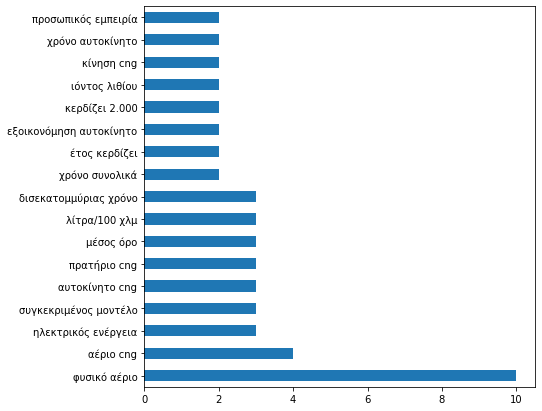

In [113]:
sum_words.sort_values(ascending = False).head(17).plot(kind = 'barh', figsize=(7,7))

In [114]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [115]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  ...  Joy  Sadness  Surprise  Trust
0            αφεση       1.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
1  ενορκη βεβαιωση       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
2          εχοντας       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
3              εχω       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
4             οριο       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 11 columns]

In [116]:
emolex_df.tail()

word  Positive  Negative  Anger  ...  Joy  Sadness  Surprise  Trust
13166     ουρλιασμα       0.0       1.0    1.0  ...  0.0      0.0       1.0    0.0
13167  κροκος αυγου       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13168      νεοτερος       1.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13169       ζεφυρος       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0
13170          ζουμ       0.0       0.0    0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 11 columns]

In [117]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True)

In [118]:
emolex_df.tail()

index          word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
13156  13166     ουρλιασμα       0.0       1.0  ...  0.0      0.0       1.0    0.0
13157  13167  κροκος αυγου       0.0       0.0  ...  0.0      0.0       0.0    0.0
13158  13168      νεοτερος       1.0       0.0  ...  0.0      0.0       0.0    0.0
13159  13169       ζεφυρος       0.0       0.0  ...  0.0      0.0       0.0    0.0
13160  13170          ζουμ       0.0       0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 12 columns]

In [119]:
nlp = spacy.load("el_core_news_sm")

In [121]:
dfAutotriti['Coomments']

0      Θεωρώ ότι τα επόμενα (λίγα) χρόνια η εξέλιξη τ...
3          Να μια καλη ειδηση! Ηλεκτρικο απο 11000 ευρω!
8      Καλό αλλά 25 χιλιάρικα τελική τιμή στην πλουσι...
10     Πιο σουλουπωμένο από τις (απαράδεκτες) προηγού...
16     Οι πολλαπλοί συνεσμοι στη πίσω αναρτηση υπάρχο...
18     Κύριοι του ειδικού τύπου το ξέρετε καλύτερα απ...
45     Δεν ξερω αν καίει λιγότερο από το πόλο, αλλά α...
53     Όλα (πολύ) καλά κ ωραία κ με το συγκεκριμένο μ...
58     Αναρωτιέμαι σε τι εξυπηρετεί πρακτικά ένα ρεκό...
63     Όταν δηλαδή τα ηλεκτρικό γίνουν προσιτά κι ακο...
66     Απευθυνεται σε λατρεις τω κλασσικων Mini, γιατ...
68     Με υπερπλήρη εξοπλισμό και 8 χρόνια εγγύηση εί...
69     Εξωτερικά είναι μάλλον πιο ενδιαφέρον από το Κ...
72     19. 000χιλ. (6.500.000 εκατομμύρια δρχ) για 1....
77     Οπως και να΄ναι το Model S ειναι πανω απο 10 χ...
79     Η ανακατευθυνση της αυτοκινησης σε εξηλεκτρισμ...
80     Και τέλος ο μήνας του μέλιτος για την Tesla......
91     Ειναι η απαντηση της Toy

In [122]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [125]:
dfAutotriti['Coomments'] = dfAutotriti['Coomments'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

In [126]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [127]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# Θέλω να ελέγξω μόνο τις λέξεις που υπάρχουν στο συναισθηματικό λεξικό

#CountVectorizer(analyzer = 'word', 
                #strip_accents = 'unicode', 
                #token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}', 
                #stop_words= lc_stop_words_df['stop_w'].tolist())


matrix = vec.fit_transform(dfAutotriti['Coomments'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 

αφεση  ενορκη βεβαιωση  εχοντας  εχω  ...  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ
0      0                0        0    0  ...             0         0        0     0
1      0                0        0    0  ...             0         0        0     0
2      0                0        0    0  ...             0         0        0     0
3      0                0        0    0  ...             0         0        0     0
4      0                0        0    0  ...             0         0        0     0

[5 rows x 13161 columns]

In [128]:
wordcount_df.shape

(26, 13161)

In [129]:
emolex_df.head()

index             word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
0      0            αφεση       1.0       0.0  ...  0.0      0.0       0.0    0.0
1      1  ενορκη βεβαιωση       0.0       0.0  ...  0.0      0.0       0.0    0.0
2      2          εχοντας       0.0       0.0  ...  0.0      0.0       0.0    0.0
3      3              εχω       0.0       0.0  ...  0.0      0.0       0.0    0.0
4      4             οριο       0.0       0.0  ...  0.0      0.0       0.0    0.0

[5 rows x 12 columns]

In [130]:
emolex_df[emolex_df.Anger == 1].tail()

index          word  Positive  Negative  ...  Joy  Sadness  Surprise  Trust
13094  13104      διεξοδος       0.0       0.0  ...  0.0      0.0       0.0    0.0
13096  13106        ζωυφια       0.0       1.0  ...  0.0      0.0       0.0    0.0
13100  13110    θυματοποιω       0.0       1.0  ...  0.0      1.0       1.0    0.0
13128  13138  αποτυχημενος       0.0       1.0  ...  0.0      0.0       0.0    0.0
13156  13166     ουρλιασμα       0.0       1.0  ...  0.0      0.0       1.0    0.0

[5 rows x 12 columns]

In [131]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [133]:
dfAutotriti.head(3)

headline  ...       date
0  ΟΔΗΓΟΥΜΕ ΤΟ ΗΛΕΚΤΡΙΚΟΟδηγούμε το νέο Hyundai I...  ...   2/7/2021
3              To 2021 στην αγορά το ηλεκτρικό Dacia  ...  17/2/2020
8  ΥΒΡΙΔΙΚΟ ΜΕ 140 PS, «ΚΑΙΕΙ» 5,3 ΛΤ.Δοκιμή: Υβρ...  ...  13/6/2021

[3 rows x 6 columns]

In [134]:
dfAutotriti['anger'] = wordcount_df[angry_words].sum(axis=1)

dfAutotriti['positivity'] = wordcount_df[positive_words].sum(axis=1)

dfAutotriti['joy'] = wordcount_df[joy_words].sum(axis=1)

dfAutotriti['disgust'] = wordcount_df[disgust_words].sum(axis=1)

dfAutotriti['surprise'] = wordcount_df[surprise_words].sum(axis=1)

dfAutotriti['trust'] = wordcount_df[trust_words].sum(axis=1)

dfAutotriti['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

dfAutotriti['sadness'] = wordcount_df[sadness_words].sum(axis=1)

dfAutotriti['negative'] = wordcount_df[negative_words].sum(axis=1)

dfAutotriti['fear'] = wordcount_df[fear_words].sum(axis=1)

In [136]:
dfAutotriti

headline  ...  fear
0    ΟΔΗΓΟΥΜΕ ΤΟ ΗΛΕΚΤΡΙΚΟΟδηγούμε το νέο Hyundai I...  ...   3.0
3                To 2021 στην αγορά το ηλεκτρικό Dacia  ...   3.0
8    ΥΒΡΙΔΙΚΟ ΜΕ 140 PS, «ΚΑΙΕΙ» 5,3 ΛΤ.Δοκιμή: Υβρ...  ...  15.0
10   ΜΕ 240 ΑΛΟΓΑ & ΚΑΤΑΝΑΛΩΣΗ 6 ΛΤ.Δοκιμή: Jeep Co...  ...   0.0
16   MILD HYBRID 1,0 ΛΤ. ΜΕ 120 PSΔοκιμή: Ήπια υβρι...  ...   1.0
18   Βενζινοκίνητα μικρά που καίνε σαν… dieselΤα 5 ...  ...  11.0
45   ΜΕ 245 ΑΛΟΓΑ - «Καίει» λιγότερο από PoloΔοκιμή...  ...   NaN
53   Στην Ελλάδα το DS 7 Crossback E-Tense με τα 22...  ...   NaN
58       Renault Zoe: Νέο ρεκόρ αυτονομίας με 765 χλμ.  ...   NaN
63        «Βόμβα» από ΔΝΤ για τεκμήρια στα ηλεκτρικά    ...   NaN
66   Mετατρέπουν κλασικά ΜΙΝΙ σε ηλεκτρικά αντί 29....  ...   NaN
68   MILD HYBRID 1,0 ΛΤ. ΜΕ 155 PSΔοκιμή: Ford Fies...  ...   NaN
69         Οι τιμές του νέου Hyundai Bayon στην Ελλάδα  ...   NaN
72   ΑΥΤΟΜΑΤΟ & ΗΠΙΑ ΥΒΡΙΔΙΚΟ ΜΕ 120 PSΔοκιμή: Kia ...  ...   NaN
77                    Η Tesla έκοψε το Model S Plaid +  ...   NaN
79    Νέα κορυφαία έκδοση για το Skoda Enyaq με 265 PS  ...   NaN
80   ΕΝΤΥΠΩΣΙΑΚΗ ΡΟΠΗ & ΑΥΤΟΝΟΜΙΑΟδηγούμε: Νέα Must...  ...   NaN
91   Το πρώτο αμιγώς ηλεκτρικό ToyotaTα «περίεργα» ...  ...   NaN
98   GADGET CAR ΜΕ 450 PSΔοκιμή: Νέο Τesla Model 3 ...  ...   NaN
99        Με οθόνη 27 ιντσών το νέο ηλεκτρικό της Ford  ...   NaN
102  Έρχονται μπαταρίες που φορτίζουν μέσα σε 10 λεπτά  ...   NaN
109         Πιο προσιτά από ποτέ τα νέα VW ID.3 & ID.4  ...   NaN
114  ΠΡΩΤΗ ΕΠΑΦΗΑπό την Κίνα με αγάπη: το ηλεκτρικό...  ...   NaN
115                    Νέο Rimac Nevera με 1.914 άλογα  ...   NaN
120               Το ηλεκτρικό Renault 4 παίρνει μορφή  ...   NaN
125  ΜΕ 218 PS & ΧΩΡΙΣ ΝΑ «ΚΑΙΕΙ»Δοκιμή: Mercedes G...  ...   NaN

[26 rows x 16 columns]

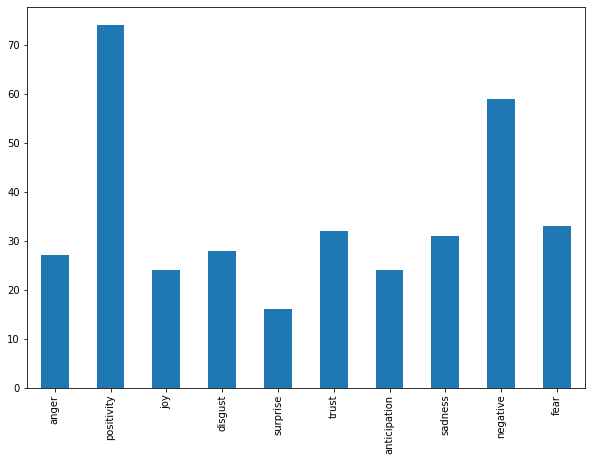

In [138]:
dfAutotriti[['anger','positivity','joy','disgust','surprise','trust','anticipation','sadness','negative','fear']].sum().plot(kind = 'bar', figsize=(10,7))